In [2]:
from Vissim_env_class import environment
from Actor_critic_class import ACAgent
from MasterAC_Agent import MasterAC_Agent
from MasterDQN_Agent import MasterDQN_Agent

# Network Specific Libraries
from Balance_Functions import balance_dictionary

# General Libraries
import numpy as np 
import pylab as plt
import os
import csv
import pandas as pd
import json

%matplotlib inline
%load_ext autoreload
%autoreload 2

# Balance

In [ ]:
model_name  = 'Balance'
#vissim_working_directory =  'C:\\Users\\Rzhang\\Desktop\\MLforFlowOptimisationOrigine\\Vissim\\'
vissim_working_directory = "E:\Backup - Onedrive\Desktop\ATI\0_TMF\MLforFlowOptimisation\Vissim"
sim_length = 1800

# all controller actions
Balance_dictionary =\
{\
    # Controller Number 2 
    0 : {'compatible_actions' : {   0 : [1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0],
                                    1 : [0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1],
                                    2 : [0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0] },
         
         'link' : [2, 40, 7, 38],
         'lane' : ['2-1', '2-2', '2-3', '40-1', '7-1', '7-2', '7-3', '38-1'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [8],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
         
         
        },
    # Controller Number 3
    1 : {'compatible_actions' : {   0 : [0, 1, 0, 0, 1, 0, 1, 1],
                                    1 : [1, 0, 0, 1, 0, 0, 0, 0],
                                    2 : [0, 0, 1, 0, 0, 1, 0, 0] },
         
         'link' : [5, 48, 70, 46],
         'lane' : ['5-1', '5-2', '5-3', '48-1', '70-1', '70-2', '70-3', '46-1'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [8],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
        },
    # Controller Number 4
    2 : {'compatible_actions' : {   0 : [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                    1 : [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                    2 : [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
                                    3 : [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]},
         
         'link' : [73, 100, 84, 95],
         'lane' : ['73-1', '73-2', '73-3', '100-1', '100-2', '100-3', '100-4',\
                  '84-1', '84-2', '84-3', '95-1', '95-2', '95-3', '95-4'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [14],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
        },
    # Controller Number 5
    3 : {'compatible_actions' : {   0 : [0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0],
                                    1 : [1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0],
                                    2 : [0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1]},
         
         'link' : [87, 36, 10, 34],
         'lane' : ['87-1', '87-2', '87-3', '36-1', '10-1', '10-2', '10-3', '34-1'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [8],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
        },
    # Controller Number 6 
    4 : {'compatible_actions' : {   0 : [0, 1, 1, 0, 0],
                                    1 : [1, 1, 0, 0, 0],
                                    2 : [0, 0, 0, 1, 0]},
         'link' : [8, 24, 13],
         'lane' : ['8-1', '8-2', '24-1', '13-1', '13-2', '13-3'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [6],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
        },
    # Controller Number 8
    5 : {'compatible_actions' : {   0 : [1, 0, 1, 0, 1, 0],
                                    1 : [0, 1, 0, 1, 0, 1]},
         'link' : [26, 23, 35],
         'lane' : ['26-1', '23-1', '35-1'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [3],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
         
        },
    # Controller Number 9
    6 : {'compatible_actions' : {   0 : [0, 1, 0, 1, 1, 1],
                                    1 : [1, 0, 1, 0, 0, 0]},
         'link' : [51, 92, 64, 19],
         'lane' : ['51-1', '92-1', '92-2', '64-1', '19-1', '19-2'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [6],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
        },
    # Contoller Number 10
    7 : {'compatible_actions' : {   0 : [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
                                    1 : [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
                                    2 : [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]},
         'link' : [18, 66, 16],
         'lane' : ['18-1', '18-2', '18-3', '66-1', '16-1', '16-2', '16-3'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [7],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
        },
    # Controller Number 12
    8 : {'compatible_actions' : {   0 : [1, 0, 1, 0, 0, 0, 0],
                                    1 : [0, 1, 0, 0, 0, 0, 0]},
         'link' : [62, 45, 44],
         'lane' : ['62-1', '45-1', '44-1'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [3],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
        },
    # Controller Number 13
    9 : {'compatible_actions' : {   0 : [0, 1, 0, 1, 1, 0, 1, 0],
                                    1 : [1, 0, 1, 0, 0, 1, 0, 1]},
         'link' : [60, 43, 55, 58],
         'lane' : ['60-1', '43-1', '55-1', '58-1'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [4],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
            
        },
    # Controller 15
    10 : {'compatible_actions' : {  0 : [1, 0, 1, 0, 0, 1, 0, 1],
                                    1 : [0, 1, 0, 1, 1, 0, 1, 0]},
         'link' : [32, 42, 30, 39],
         'lane' : ['32-1', '42-1', '30-1', '39-1'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [4],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
        },
    # Controller 16
    11 : {'compatible_actions' :  { 0 : [1, 0, 1, 0, 0, 1, 0, 1],
                                    1 : [0, 1, 0, 1, 1, 0, 1, 0]},
         'link' : [29, 50, 28, 47],
         'lane' : ['29-1', '50-1', '28-1', '47-1'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [4],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
        },
    # Controller 17
    12 : {'compatible_actions' :  { 0 : [1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1],
                                    1 : [0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1],
                                    2 : [0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0],
                                    3 : [0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0]},
         'link' : [27, 22, 25, 77],
         'lane' : ['27-1', '22-1', '22-2', '22-3', '25-1', '77-1', '77-2'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [7],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
            
        },
    # Controller 33 
    13 : {'compatible_actions' :  { 0 : [1, 0, 0, 1, 0, 0, 1, 0, 0],
                                    1 : [0, 0, 1, 1, 0, 1, 0, 0, 0],
                                    2 : [0, 1, 0, 0, 1, 1, 0, 1, 1]},
         'link' : [68, 71, 75],
         'lane' : ['68-1', '68-2', '68-3', '71-1', '71-2', '75-1'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [6],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
        }
}

In [ ]:
env = environment(model_name, vissim_working_directory, sim_length, Balance_dictionary,\
            timesteps_per_second = 1, mode = 'training', delete_results = True, verbose = True)

In [ ]:
env.SCUs

In [ ]:
env.SCUs[0].state

In [ ]:
#env.reset()

In [ ]:
actions = dict()
for i in range(len(env.SCUs)):
    actions[i]=0
    
print(actions)

In [ ]:
class Cyclic_Control():
    def __init__(self,size):
        self.action = 0
        self.size = size
        
    def choose_action(self,state=None):
        self.action = (self.action + 1) % self.size
        return self.action
CC = [] 

for idx, info in Balance_dictionary.items():
        cycle_size = len(info['compatible_actions'])
        CC.append(Cyclic_Control(cycle_size))

In [ ]:
start_state = env.get_state()
for idx, s in start_state.items():
    actions[idx] = CC[idx].choose_action(s)
    
for _ in range(10000):
    action_required, SARSDs = env.step(actions)
    if action_required : 
        actions = dict()
        for idx , sarsd in SARSDs.items():
            s,a,r,ns,d = sarsd
            #print(sarsd)
            
            # in order to find the next action you need to evaluate the "next_state" because it is the current state of the simulator
            actions[idx] = CC[idx].choose_action(ns)
        
    if env.done :
        env.reset()
        for idx, s in start_state.items():
            actions[idx] = CC[idx].choose_action(ns)
        
        

# Balance RL AC

In [ ]:
model_name  = 'Balance'
vissim_working_directory =  'C:\\Users\\Rzhang\\Desktop\\MLforFlowOptimisationOrigine\\Vissim\\'
sim_length = 1800
agent_type = 'AC'

# all controller actions
Balance_dictionary = balance_dictionary(agent_type)


In [ ]:
env = environment(model_name, vissim_working_directory, sim_length, Balance_dictionary,\
            timesteps_per_second = 1, mode = 'training', delete_results = True, verbose = True)

In [ ]:

# Agent hyperparameters
gamma = 0.85
alpha = 0.0005
value = 25
entropy = 5000
n_step_size = 11
reduce_entropy_every = 1000
entropy_threshold = 0.5
timesteps_per_second = 1


# for the monitoring only for AC
horizon = 50
n_sample = 10

Balance_MultiAc_Agents = MasterAC_Agent(model_name, vissim_working_directory, sim_length, Balance_dictionary, n_step_size, gamma, alpha, entropy, value, \
                timesteps_per_second = timesteps_per_second, verbose = True, horizon = 100, \
                n_sample = 10)


In [ ]:
Balance_MultiAc_Agents.train(1000)

Balance_MultiAc_Agents.save()

In [ ]:
Balance_MultiAc_Agents = MasterAC_Agent(model_name, vissim_working_directory, sim_length, Balance_dictionary, n_step_size, gamma, alpha, entropy, value, \
                timesteps_per_second = timesteps_per_second, verbose = True, horizon = 100, \
                n_sample = 10)

Balance_MultiAc_Agents.load(best = False)

In [ ]:
Agents = []
for idx, info in Balance_dictionary['junctions'].items():
        acts = info['compatible_actions']
        Agent = ACAgent(info['state_size'], len(acts), idx, n_step_size, gamma, alpha, entropy, value)
        Agents.append(Agent)

In [ ]:
start_state = env.get_state()
actions = {}
for idx, s in start_state.items():
            actions[idx] = int(Agents[idx].choose_action(s))

for i in range(30000):
    action_required, SARSDs = env.step_to_next_action(actions)
    if action_required : 
        actions = dict()
        for idx , sarsd in SARSDs.items():
            s,a,r,ns,d = sarsd
            
            #print(sarsd)
            Agents[idx].remember(s,a,r,ns,d)
            if len(Agents[idx].memory) >= Agents[idx].n_step_size :
                Agents[idx].learn() 
            
            # in order to find the next action you need to evaluate the "next_state" because it is the current state of the simulator
            actions[idx] = int(Agents[idx].choose_action(ns))
            #print(actions)
            
            if (i+1)%reduce_entropy_every == 0:
                if Agents[idx].params['entropy'] >= entropy_threshold :
                    Agents[idx].reduce_entropy()
                    print ("Agent {} : Entropy reduced to {} " .format(idx, Agents[idx].params['entropy']))
        
    # For the saving , monitoring of the agent 
    if env.done :
        env.reset()
        
        
        # Only for AC
        for idx, agent in enumerate(Agents):
            predicted_values, true_values, proba0, probas = agent.value_check(horizon, n_sample)
            print ("Agent {} : Predicted Values and True Return : \n {} \n {}" .format(idx, predicted_values, true_values))
            print ("Agent {} : Proba distribution on those states : \n {}" .format(idx, probas))
            print ("Agent {} : Proba distribution on the 0 state : \n {}" .format(idx, proba0))
            agent.reset()
                    
        
        for idx, s in start_state.items():
            actions[idx] = Agents[idx].choose_action(s)

In [ ]:
env.reset()

# Balance DQN Debug

In [ ]:
###############################
## Initialization Parameters ##
###############################

intersection = "1_2_4"
map_name  = 'Balance_int'+str(intersection)
model_name = map_name
vissim_working_directory = 'C:\\Users\\acabrejasegea\\OneDrive - The Alan Turing Institute\\Desktop\\ATI\\0_TMF\\MLforFlowOptimisation\\Vissim\\'
#vissim_working_directory = "E:\\OneDrive - University of Warwick\\Desktop\\ATI\\0_TMF\\MLforFlowOptimisation\\Vissim"

## Simulation Parameters
Random_Seed = 44
sim_length = 9001
timesteps_per_second = 1
agent_type = "DDQN"
#actions_set = 'default_actions'     # 'default_actions' or 'all_actions'
actions_set = 'all_actions'

## DQN Hyperaramenters
episodes = 500
copy_weights_frequency = 10

PER_activated = True
memory_size = 5000
batch_size = 128
batches_per_episode = 10

alpha = 0.00005
gamma = 0.95

# Load and partition balance dictionary
Balance_dictionary = balance_dictionary(agent_type)
if intersection == "1_2_4":
    intersection = 1
elif intersection == "11_12":
    intersection = 11
partial_dictionary = {"junctions": { (intersection-1) : Balance_dictionary["junctions"][intersection-1]},\
                      "demand": Balance_dictionary["demand"]}

Session_ID = map_name + "_" + actions_set + "_" + str(episodes) + "_" + str(sim_length-1) + "_" + agent_type
print("Current simulation: {}".format(Session_ID))

# Exploration Schedule ("linear" or "geometric")
exploration_schedule = "geometric"
epsilon_start = 1
epsilon_end   = 0.01

def choose_schedule(exploration_schedule, espilon_start, epsilon_end, episodes):
    if exploration_schedule == "linear":
        epsilon_decay = 1.2*(epsilon_end - epsilon_start)/(episodes-1)
        epsilon_sequence = [1 + epsilon_decay * entry for entry in range(episodes+1)]
        epsilon_sequence = [0.01 if entry < 0.01 else entry for entry in epsilon_sequence]
    elif exploration_schedule == "geometric":
        epsilon_decay = np.power(epsilon_end/epsilon_start, 1./(episodes-1)) # Geometric decay
        epsilon_sequence = [epsilon_start * epsilon_decay ** entry for entry in range(episodes+1)]
        epsilon_sequence = [0.01 if entry < 0.01 else entry for entry in epsilon_sequence]
    elif exploration_schedule == "entropy":
        pass
    else:
        print("ERROR: Unrecognized choice of exploration schedule.")
        
    # Plotting exploration schedule
    plt.figure(figsize=(8,4.5))
    x_series = np.array(range(1,episodes+1))
    y_series = epsilon_sequence[0:episodes]
    plt.plot(x_series, y_series, '-b')
    plt.xlabel('Episodes')
    plt.ylabel('Ratio of random exploration')
    plt.title('Exploration schedule')
    plt.show()
    return(epsilon_sequence)

epsilon_sequence = choose_schedule(exploration_schedule, epsilon_start, epsilon_end, episodes)

In [ ]:
## Deploy Agents
Balance_int_MultiDQN_Agents = MasterDQN_Agent(model_name, vissim_working_directory, sim_length, partial_dictionary, actions_set,\
                gamma, alpha, agent_type, memory_size, PER_activated, batch_size, batches_per_episode, copy_weights_frequency, epsilon_sequence,\
                Random_Seed, timesteps_per_second, Session_ID, verbose = True)
Balance_int_MultiDQN_Agents.prepopulate_memory()

In [ ]:
# Deploy Environment
env = None
env = environment(model_name, vissim_working_directory, sim_length, partial_dictionary, actions_set,\
                  Random_Seed = Random_Seed, timesteps_per_second = timesteps_per_second, mode = 'debug', delete_results = True, verbose=True)

In [ ]:
## Test to ensure correct deployment of agents

# Test 1: Check number of agents
print(env.SCUs.items())

# Test 2: Check Dictionary for each agent
agent = 0
print("state_type: " + env.SCUs[agent].state_type)
print("state_size: ")
print(env.SCUs[agent].state_size)
print("reward_type: ")
print(env.SCUs[agent].reward_type)
print("compatible_actions: ")
print(env.SCUs[agent].compatible_actions)
print("all_actions: ")
print(env.SCUs[agent].all_actions)
print("Lanes_names: " )
print(env.SCUs[agent].Lanes_names)
print("Links_names: ")
print(env.SCUs[agent].Links_names)
print("time_steps_per_second: " + str(env.SCUs[agent].time_steps_per_second))
print("queues_counter_ID: " )
print(env.SCUs[agent].queues_counter_ID)
print("queues_counters: ")
print(env.SCUs[agent].queues_counters)
print("signal_controller: ")
print(env.SCUs[agent].signal_controller)
print("Signal_Groups: " )
print(env.SCUs[agent].signal_groups)
print("Node: " + str(env.SCUs[agent].Node))

## CORRECT - No apparent issues from this test

In [ ]:
## Tests to ensure correct STATE READING
timesteps = 1
for i in range(timesteps):
    env.Vissim.Simulation.RunSingleStep()

## Test 3: Correct Reading of queues from QUEUE COUNTERS
print("queues_counter_ID: " )
print(env.SCUs[0].queues_counter_ID)
print([env.Vissim.Net.QueueCounters.ItemByKey(i).AttValue('QLen(Current, Last)') for i in env.SCUs[0].queues_counter_ID])
    
# Test 4: Correct Reading of Aggregated Queues by SCU
print(env.SCUs[0].calculate_queues())

## Test 5: Correct Reading of Global Queues by ENVIRONMENT
print(env.get_queues())

## CORRECT - No apparent issues from this test

In [ ]:
## Test 6: Correct Reading of Initial State, and Generation of according actions
start_state = env.get_state()
actions = {}
print("Dict([(Agent_ID, array(state))])")
print(start_state.items())
print("")
for idx, s in start_state.items():
    actions[idx] = Balance_int_MultiDQN_Agents.Agents[idx].choose_action(s)
print("{Agent_ID : Chosen_Action}")
print(actions)

## CORRECT - No apparent issues from this test

In [ ]:
## Test 7: Correct Reading of General State from SCU and Generation of according actions
SARSDs = env.step_to_next_action(actions)
actions = dict()
for idx , sarsd in SARSDs.items():
    s,a,r,ns,d = sarsd
    
print("Agent_ID: " + str(SARSDs.keys()))
print("Agent_State:")
print(SARSDs[0][0][0])
print("Agent_Action: " + str(SARSDs[0][1]))
print("Agent_Reward: " + str(SARSDs[0][2]))
print("Agent_Next_State:")
print(SARSDs[0][3][0])
print("Done: " + str(SARSDs[0][4]))

## CORRECT - No apparent issues from this test

In [ ]:
## Test 8: Correct operation of signal groups
signal_group = 5
env.SCUs[0].signal_groups[signal_group].SetAttValue("SigState", "GREEN")
env.Vissim.Simulation.RunSingleStep()

## CORRECT - No apparent issues from this test

In [ ]:
###### Test 9-1: Correct implementation of actions (SETUP)
for idx, agent in Balance_int_MultiDQN_Agents.Agents.items():
    agent.reset()

start_state = env.get_state()
print("Initial State: {Agent_ID: initual queues}")
print(start_state)
actions = {}
for idx, s in start_state.items():
    actions[idx] = Balance_int_MultiDQN_Agents.Agents[idx].choose_action(s)
print("Initial Choice of Actions: {Agent_ID: action}")    
print(actions)

# That is not a clean way to do this
def to_dictionary(dictionary,idx,value):
    """
    Assign a value to an index in a dictionary
    """
    dictionary[idx] = value
    
## CORRECT - No apparent issues from this test

In [ ]:
###### Test 9-2: Correct implementation of actions (EXECUTION)
##
## ATTENTION: If an "index out of range" is requested, the system will break an will\
##            require a reset. This does not affect normal simulation.

actions[0] = 4
# This is step_to_next_action() function
while not env.action_required:
    
    # This is the step() function
    Sarsd = dict()
    
    # The default position is that no action is required, only a step of simulator
    env.action_required = False
    #print("false 1")
    
    [scu.action_update(actions[0] , green_time = 5 ) for idx, scu in env.SCUs.items() if scu.action_required]
    
    [scu.update() for idx,scu in env.SCUs.items()]
    
    env.Vissim.Simulation.RunSingleStep()
    
    [to_dictionary(Sarsd,idx,scu.sars()+[env.done]) for idx,scu in env.SCUs.items() if scu.action_required ]
    
    if len(Sarsd) > 0 or env.done :
        env.action_required = True
        #print("TRUE")
    
    print(Sarsd)
        
env.action_required = False
#print("false 2")


In [ ]:
## Test 10: Correct changing of phases based on actions

In [ ]:
## Test 11: Correct calculation of rewards

# Balance RL DQN Partial Training

In [3]:
intersection = "1_2_4"
map_name  = 'Balance_int'+str(intersection)
model_name = map_name
#vissim_working_directory = 'C:\\Users\\acabrejasegea\\OneDrive - The Alan Turing Institute\\Desktop\\ATI\\0_TMF\\MLforFlowOptimisation\\Vissim\\'
vissim_working_directory = "E:\\OneDrive - University of Warwick\\Desktop\\ATI\\0_TMF\\MLforFlowOptimisation\\Vissim"

## Simulation Parameters
Random_Seed = 44
sim_length = 9001
timesteps_per_second = 1
agent_type = "DDQN"
actions = 'default_actions'     # 'default_actions' or 'all_actions'

## DQN Hyperaramenters
episodes = 501
copy_weights_frequency = 10

PER_activated = True
memory_size = 5000
batch_size = 128
batches_per_episode = 10

alpha = 0.00005
gamma = 0.95

# Load and partition balance dictionary
Balance_dictionary = balance_dictionary(agent_type)
if intersection == "1_2_4":
    intersection = 1
elif intersection == "11_12":
    intersection = 11
partial_dictionary = {"junctions": { (intersection-1) : Balance_dictionary["junctions"][intersection-1]},\
                      "demand": Balance_dictionary["demand"]}

Session_ID = map_name + "_" + actions + "_" + str(episodes) + "_" + str(sim_length-1) + "_" + agent_type
print("Current simulation: {}".format(Session_ID))

Current simulation: Balance_int1_2_4_default_actions_501_9000_DDQN


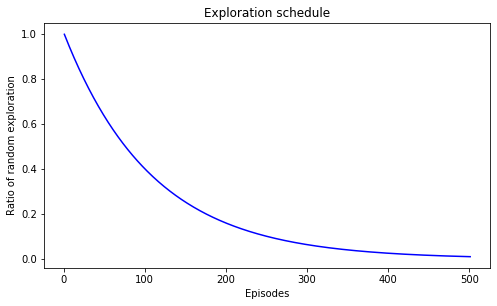

In [4]:
# Exploration Schedule ("linear" or "geometric")
exploration_schedule = "geometric"
epsilon_start = 1
epsilon_end   = 0.01

def choose_schedule(exploration_schedule, espilon_start, epsilon_end, episodes):
    if exploration_schedule == "linear":
        epsilon_decay = 1.2*(epsilon_end - epsilon_start)/(episodes-1)
        epsilon_sequence = [1 + epsilon_decay * entry for entry in range(episodes+1)]
        epsilon_sequence = [0.01 if entry < 0.01 else entry for entry in epsilon_sequence]
    elif exploration_schedule == "geometric":
        epsilon_decay = np.power(epsilon_end/epsilon_start, 1./(episodes-1)) # Geometric decay
        epsilon_sequence = [epsilon_start * epsilon_decay ** entry for entry in range(episodes+1)]
        epsilon_sequence = [0.01 if entry < 0.01 else entry for entry in epsilon_sequence]
    elif exploration_schedule == "entropy":
        pass
    else:
        print("ERROR: Unrecognized choice of exploration schedule.")
        
    # Plotting exploration schedule
    plt.figure(figsize=(8,4.5))
    x_series = np.array(range(1,episodes+1))
    y_series = epsilon_sequence[0:episodes]
    plt.plot(x_series, y_series, '-b')
    plt.xlabel('Episodes')
    plt.ylabel('Ratio of random exploration')
    plt.title('Exploration schedule')
    plt.show()
    return(epsilon_sequence)

epsilon_sequence = choose_schedule(exploration_schedule, epsilon_start, epsilon_end, episodes)


In [5]:
Balance_int_MultiDQN_Agents = MasterDQN_Agent(model_name, vissim_working_directory, sim_length, partial_dictionary, actions,\
                gamma, alpha, agent_type, memory_size, PER_activated, batch_size, batches_per_episode, copy_weights_frequency, epsilon_sequence,\
                Random_Seed, timesteps_per_second, Session_ID, verbose = True)

INTERSECTION 0: SETTING UP AGENT
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 8)]               0         
_________________________________________________________________
dense (Dense)                (None, 48)                432       
_________________________________________________________________
dense_1 (Dense)              (None, 48)                2352      
_________________________________________________________________
dense_2 (Dense)              (None, 48)                2352      
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 147       
Total params: 5,283
Trainable params: 5,283
Non-trainable params: 0
________________________________________

In [6]:
Balance_int_MultiDQN_Agents.prepopulate_memory()

Experience file not found. Generating now...
Working Directory set to: E:\OneDrive - University of Warwick\Desktop\ATI\0_TMF\MLforFlowOptimisation\Vissim
Generating Cache...
Cache generated.

****************************
*   COM Server dispatched  *
****************************

Attempting to load Model File: Balance_int1_2_4.inpx ...
Model File load process successful.
Simulation length set to 9001 seconds.
Results from Previous Simulations: Deleted. Fresh Start Available.
Fetched and containerized Network Object 

*******************************************************
*                                                     *
*                COM SETUP COMPLETE                   *
*                                                     *
*******************************************************

Random seed set in simulator. Random Seed = 44
Deploying Network Parser...
Successful Network Crawl: Identified SignalControllers, Links, Lanes and Vehicle Inputs.

Setting Simulation mode to: trai

In [ ]:
Balance_int_MultiDQN_Agents.train(episodes)

Working Directory set to: E:\OneDrive - University of Warwick\Desktop\ATI\0_TMF\MLforFlowOptimisation\Vissim
Generating Cache...
Cache generated.

****************************
*   COM Server dispatched  *
****************************

Attempting to load Model File: Balance_int1_2_4.inpx ...
Model File load process successful.
Simulation length set to 9001 seconds.
Results from Previous Simulations: Deleted. Fresh Start Available.
Fetched and containerized Network Object 

*******************************************************
*                                                     *
*                COM SETUP COMPLETE                   *
*                                                     *
*******************************************************

Random seed set in simulator. Random Seed = 44
Deploying Network Parser...
Successful Network Crawl: Identified SignalControllers, Links, Lanes and Vehicle Inputs.

Setting Simulation mode to: training
Starting Deployments of Signal Control U

128/128 - 0s - loss: 276860.9375
128/128 - 0s - loss: 274844.5000
Reducing exploration for all agents to 0.879

Episode 15: Starting computation.
Random Seed Set to 59
Episode 15: Finished running.
Agent 0, Average Reward: -1009.13
128/128 - 0s - loss: 349970.5625
128/128 - 0s - loss: 352128.0938
128/128 - 0s - loss: 352830.3125
128/128 - 0s - loss: 327323.7812
128/128 - 0s - loss: 341228.2812
128/128 - 0s - loss: 356241.9688
128/128 - 0s - loss: 339715.6562
128/128 - 0s - loss: 354205.2812
128/128 - 0s - loss: 338430.5312
128/128 - 0s - loss: 359045.0312
Reducing exploration for all agents to 0.871

Episode 16: Starting computation.
Random Seed Set to 60
Episode 16: Finished running.
Agent 0, Average Reward: -1121.16
128/128 - 0s - loss: 441171.8125
128/128 - 0s - loss: 429533.6562
128/128 - 0s - loss: 454145.0938
128/128 - 0s - loss: 425470.2812
128/128 - 0s - loss: 416124.7500
128/128 - 0s - loss: 428400.9375
128/128 - 0s - loss: 448302.1562
128/128 - 0s - loss: 440051.3438
128/128 

128/128 - 0s - loss: 416621.9062
Weights succesfully copied to Target model for Agent 0.
Reducing exploration for all agents to 0.7586

Episode 31: Starting computation.
Random Seed Set to 75
Episode 31: Finished running.
Agent 0, Average Reward: -1294.6
128/128 - 0s - loss: 555365.7500
128/128 - 0s - loss: 570615.1875
128/128 - 0s - loss: 575839.1875
128/128 - 0s - loss: 589572.6250
128/128 - 0s - loss: 547201.0000
128/128 - 0s - loss: 517595.4688
128/128 - 0s - loss: 581420.0625
128/128 - 0s - loss: 564523.1875
128/128 - 0s - loss: 572160.4375
128/128 - 0s - loss: 560293.9375
Reducing exploration for all agents to 0.7516

Episode 32: Starting computation.
Random Seed Set to 76
Episode 32: Finished running.
Agent 0, Average Reward: -1011.81
128/128 - 0s - loss: 598243.9375
128/128 - 0s - loss: 607961.1875
128/128 - 0s - loss: 613588.8125
128/128 - 0s - loss: 607220.0625
128/128 - 0s - loss: 602067.0000
128/128 - 0s - loss: 607489.5625
128/128 - 0s - loss: 616436.5000
128/128 - 0s - lo

128/128 - 0s - loss: 442492.8438
128/128 - 0s - loss: 448361.8438
Reducing exploration for all agents to 0.6546

Episode 47: Starting computation.
Random Seed Set to 91
Episode 47: Finished running.
Agent 0, Average Reward: -475.37
Saving architecture, weights, optimizer state for best agent-0
128/128 - 0s - loss: 331612.5938
128/128 - 0s - loss: 341239.0625
128/128 - 0s - loss: 353748.9062
128/128 - 0s - loss: 326067.2812
128/128 - 0s - loss: 312893.9062
128/128 - 0s - loss: 333078.6562
128/128 - 0s - loss: 331909.0625
128/128 - 0s - loss: 333935.1250
128/128 - 0s - loss: 312527.6562
128/128 - 0s - loss: 319314.6250
Reducing exploration for all agents to 0.6486

Episode 48: Starting computation.
Random Seed Set to 92
Episode 48: Finished running.
Agent 0, Average Reward: -350.7
Saving architecture, weights, optimizer state for best agent-0
128/128 - 0s - loss: 191112.2031
128/128 - 0s - loss: 188315.3281
128/128 - 0s - loss: 176524.1406
128/128 - 0s - loss: 175938.0156
128/128 - 0s - 

128/128 - 0s - loss: 274103.7812
128/128 - 0s - loss: 277052.8750
128/128 - 0s - loss: 277599.9688
128/128 - 0s - loss: 279004.8125
128/128 - 0s - loss: 283015.3438
128/128 - 0s - loss: 266916.9688
Reducing exploration for all agents to 0.5649

Episode 63: Starting computation.
Random Seed Set to 107
Episode 63: Finished running.
Agent 0, Average Reward: -589.93
128/128 - 0s - loss: 279561.5625
128/128 - 0s - loss: 290020.2812
128/128 - 0s - loss: 280972.2500
128/128 - 0s - loss: 281492.8438
128/128 - 0s - loss: 289984.5625
128/128 - 0s - loss: 276865.5625
128/128 - 0s - loss: 256197.3281
128/128 - 0s - loss: 263926.0625
128/128 - 0s - loss: 279194.8438
128/128 - 0s - loss: 258671.2344
Reducing exploration for all agents to 0.5598

Episode 64: Starting computation.
Random Seed Set to 108
Episode 64: Finished running.
Agent 0, Average Reward: -570.66
128/128 - 0s - loss: 252801.7656
128/128 - 0s - loss: 235439.5625
128/128 - 0s - loss: 244054.0156
128/128 - 0s - loss: 234870.8594
128/12

128/128 - 0s - loss: 78230.9297
128/128 - 0s - loss: 85642.0547
128/128 - 0s - loss: 75370.2422
Reducing exploration for all agents to 0.4875

Episode 79: Starting computation.
Random Seed Set to 123
Episode 79: Finished running.
Agent 0, Average Reward: -629.38
128/128 - 0s - loss: 94977.1641
128/128 - 0s - loss: 100673.7734
128/128 - 0s - loss: 102076.5703
128/128 - 0s - loss: 95982.1875
128/128 - 0s - loss: 99003.1406
128/128 - 0s - loss: 97926.6562
128/128 - 0s - loss: 96976.6797
128/128 - 0s - loss: 92562.4922
128/128 - 0s - loss: 97984.1484
128/128 - 0s - loss: 91551.9688
Reducing exploration for all agents to 0.4831

Episode 80: Starting computation.
Random Seed Set to 124
Episode 80: Finished running.
Agent 0, Average Reward: -658.51
128/128 - 0s - loss: 113223.8516
128/128 - 0s - loss: 110266.2109
128/128 - 0s - loss: 106943.9922
128/128 - 0s - loss: 100387.0547
128/128 - 0s - loss: 108477.5547
128/128 - 0s - loss: 111292.8516
128/128 - 0s - loss: 114449.7578
128/128 - 0s - lo

128/128 - 0s - loss: 15304.9580
128/128 - 0s - loss: 15616.9590
128/128 - 0s - loss: 13981.0186
128/128 - 0s - loss: 13610.1133
128/128 - 0s - loss: 12644.1621
128/128 - 0s - loss: 15942.3848
128/128 - 0s - loss: 17422.6309
128/128 - 0s - loss: 16496.9160
128/128 - 0s - loss: 16181.8926
Reducing exploration for all agents to 0.4207

Episode 95: Starting computation.
Random Seed Set to 139
Episode 95: Finished running.
Agent 0, Average Reward: -102.58
Saving architecture, weights, optimizer state for best agent-0
128/128 - 0s - loss: 12594.8164
128/128 - 0s - loss: 14941.4824
128/128 - 0s - loss: 13229.1201
128/128 - 0s - loss: 11318.2734
128/128 - 0s - loss: 13470.6523
128/128 - 0s - loss: 12998.5352
128/128 - 0s - loss: 12675.0605
128/128 - 0s - loss: 13377.9775
128/128 - 0s - loss: 15840.2188
128/128 - 0s - loss: 11101.0508
Reducing exploration for all agents to 0.4169

Episode 96: Starting computation.
Random Seed Set to 140
Episode 96: Finished running.
Agent 0, Average Reward: -10

128/128 - 0s - loss: 18594.2871
128/128 - 0s - loss: 14952.0020
128/128 - 0s - loss: 14807.6426
128/128 - 0s - loss: 16716.5684
128/128 - 0s - loss: 12290.9248
128/128 - 0s - loss: 12576.3281
128/128 - 0s - loss: 14657.9980
128/128 - 0s - loss: 13413.1875
128/128 - 0s - loss: 16975.1270
Weights succesfully copied to Target model for Agent 0.
Reducing exploration for all agents to 0.3631

Episode 111: Starting computation.
Random Seed Set to 155
Episode 111: Finished running.
Agent 0, Average Reward: -139.23
128/128 - 0s - loss: 17338.1719
128/128 - 0s - loss: 16494.8809
128/128 - 0s - loss: 15235.8418
128/128 - 0s - loss: 18285.8301
128/128 - 0s - loss: 19274.2676
128/128 - 0s - loss: 18834.7617
128/128 - 0s - loss: 16418.9844
128/128 - 0s - loss: 17481.2969
128/128 - 0s - loss: 17953.1699
128/128 - 0s - loss: 18868.3418
Reducing exploration for all agents to 0.3597

Episode 112: Starting computation.
Random Seed Set to 156
Episode 112: Finished running.
Agent 0, Average Reward: -128.3

128/128 - 0s - loss: 447447.5938
128/128 - 0s - loss: 418822.5625
128/128 - 0s - loss: 419700.1875
128/128 - 0s - loss: 404210.3438
128/128 - 0s - loss: 368426.5625
128/128 - 0s - loss: 355314.7500
128/128 - 0s - loss: 314681.8125
128/128 - 0s - loss: 308767.6250
Reducing exploration for all agents to 0.3133

Episode 127: Starting computation.
Random Seed Set to 171
Episode 127: Finished running.
Agent 0, Average Reward: -559.69
128/128 - 0s - loss: 291103.3438
128/128 - 0s - loss: 271532.0625
128/128 - 0s - loss: 248009.8906
128/128 - 0s - loss: 234375.7656
128/128 - 0s - loss: 217019.7656
128/128 - 0s - loss: 200794.6875
128/128 - 0s - loss: 185691.7656
128/128 - 0s - loss: 178262.3594
128/128 - 0s - loss: 168159.1562
128/128 - 0s - loss: 145528.6094
Reducing exploration for all agents to 0.3105

Episode 128: Starting computation.
Random Seed Set to 172
Episode 128: Finished running.
Agent 0, Average Reward: -177.31
128/128 - 0s - loss: 142303.3906
128/128 - 0s - loss: 117071.2109
12

128/128 - 0s - loss: 18337.1973
128/128 - 0s - loss: 17007.3691
128/128 - 0s - loss: 16395.8594
128/128 - 0s - loss: 13082.8867
128/128 - 0s - loss: 13375.4932
128/128 - 0s - loss: 16078.3379
Reducing exploration for all agents to 0.2704

Episode 143: Starting computation.
Random Seed Set to 187
Episode 143: Finished running.
Agent 0, Average Reward: -176.17
128/128 - 0s - loss: 18163.5586
128/128 - 0s - loss: 16623.5195
128/128 - 0s - loss: 20492.4414
128/128 - 0s - loss: 21609.7812
128/128 - 0s - loss: 18636.5469
128/128 - 0s - loss: 21050.8809
128/128 - 0s - loss: 18354.1387
128/128 - 0s - loss: 17625.9707
128/128 - 0s - loss: 21744.9141
128/128 - 0s - loss: 21470.4316
Reducing exploration for all agents to 0.2679

Episode 144: Starting computation.
Random Seed Set to 188
Episode 144: Finished running.
Agent 0, Average Reward: -111.83
128/128 - 0s - loss: 19539.1621
128/128 - 0s - loss: 17544.4648
128/128 - 0s - loss: 16700.6387
128/128 - 0s - loss: 17077.2715
128/128 - 0s - loss: 1

128/128 - 0s - loss: 24335.7402
128/128 - 0s - loss: 25393.1016
128/128 - 0s - loss: 25275.4395
Reducing exploration for all agents to 0.2333

Episode 159: Starting computation.
Random Seed Set to 203
Episode 159: Finished running.
Agent 0, Average Reward: -89.48
128/128 - 0s - loss: 19143.9492
128/128 - 0s - loss: 18795.2598
128/128 - 0s - loss: 16803.5195
128/128 - 0s - loss: 17236.7598
128/128 - 0s - loss: 18339.7676
128/128 - 0s - loss: 19542.6328
128/128 - 0s - loss: 16540.0703
128/128 - 0s - loss: 13711.0371
128/128 - 0s - loss: 16088.0869
128/128 - 0s - loss: 14228.2754
Reducing exploration for all agents to 0.2312

Episode 160: Starting computation.
Random Seed Set to 204
Episode 160: Finished running.
Agent 0, Average Reward: -104.78
128/128 - 0s - loss: 14401.4395
128/128 - 0s - loss: 12238.9619
128/128 - 0s - loss: 9659.0908
128/128 - 0s - loss: 11512.4512
128/128 - 0s - loss: 11480.4883
128/128 - 0s - loss: 10435.8418
128/128 - 0s - loss: 11786.6934
128/128 - 0s - loss: 966

Reducing exploration for all agents to 0.2014

Episode 175: Starting computation.
Random Seed Set to 219
Episode 175: Finished running.
Agent 0, Average Reward: -86.06
128/128 - 0s - loss: 15586.7188
128/128 - 0s - loss: 15165.8164
128/128 - 0s - loss: 13722.3906
128/128 - 0s - loss: 16785.6328
128/128 - 0s - loss: 17700.6797
128/128 - 0s - loss: 14755.9248
128/128 - 0s - loss: 17823.4551
128/128 - 0s - loss: 15198.3711
128/128 - 0s - loss: 15539.8301
128/128 - 0s - loss: 15650.4297
Reducing exploration for all agents to 0.1995

Episode 176: Starting computation.
Random Seed Set to 220
Episode 176: Finished running.
Agent 0, Average Reward: -87.12
128/128 - 0s - loss: 17338.3867
128/128 - 0s - loss: 15231.0391
128/128 - 0s - loss: 12450.4463
128/128 - 0s - loss: 12829.4336
128/128 - 0s - loss: 13163.5078
128/128 - 0s - loss: 19308.3613
128/128 - 0s - loss: 12522.3887
128/128 - 0s - loss: 15362.5625
128/128 - 0s - loss: 16444.5156
128/128 - 0s - loss: 11992.2871
Reducing exploration for

Random Seed Set to 235
Episode 191: Finished running.
Agent 0, Average Reward: -80.44
128/128 - 0s - loss: 11532.9727
128/128 - 0s - loss: 7679.3799
128/128 - 0s - loss: 8736.9883
128/128 - 0s - loss: 9867.9746
128/128 - 0s - loss: 7658.6162
128/128 - 0s - loss: 12821.4727
128/128 - 0s - loss: 8044.4863
128/128 - 0s - loss: 8635.3535
128/128 - 0s - loss: 9337.8320
128/128 - 0s - loss: 8016.1294
Reducing exploration for all agents to 0.1722

Episode 192: Starting computation.
Random Seed Set to 236
Episode 192: Finished running.
Agent 0, Average Reward: -89.64
128/128 - 0s - loss: 10483.8711
128/128 - 0s - loss: 9141.1855
128/128 - 0s - loss: 9190.4990
128/128 - 0s - loss: 10223.4561
128/128 - 0s - loss: 9227.2344
128/128 - 0s - loss: 9584.9844
128/128 - 0s - loss: 9737.9648
128/128 - 0s - loss: 10217.5371
128/128 - 0s - loss: 8723.6230
128/128 - 0s - loss: 12310.3193
Reducing exploration for all agents to 0.1706

Episode 193: Starting computation.
Random Seed Set to 237
Episode 193: Fi

128/128 - 0s - loss: 9385.1523
128/128 - 0s - loss: 10556.8408
128/128 - 0s - loss: 9095.1738
128/128 - 0s - loss: 8815.3662
128/128 - 0s - loss: 10640.3721
128/128 - 0s - loss: 10713.7314
Reducing exploration for all agents to 0.1486

Episode 208: Starting computation.
Random Seed Set to 252
Episode 208: Finished running.
Agent 0, Average Reward: -171.32
128/128 - 0s - loss: 8077.7544
128/128 - 0s - loss: 8894.3672
128/128 - 0s - loss: 11116.2822
128/128 - 0s - loss: 10309.9033
128/128 - 0s - loss: 12804.1182
128/128 - 0s - loss: 9086.1455
128/128 - 0s - loss: 13781.2627
128/128 - 0s - loss: 11870.8213
128/128 - 0s - loss: 12331.1445
128/128 - 0s - loss: 10433.2510
Reducing exploration for all agents to 0.1472

Episode 209: Starting computation.
Random Seed Set to 253
Episode 209: Finished running.
Agent 0, Average Reward: -619.7
128/128 - 0s - loss: 35746.8945
128/128 - 0s - loss: 31391.2246
128/128 - 0s - loss: 35014.4727
128/128 - 0s - loss: 32800.0898
128/128 - 0s - loss: 34357.86

128/128 - 0s - loss: 35995.9844
128/128 - 0s - loss: 37221.7969
128/128 - 0s - loss: 37335.2422
Reducing exploration for all agents to 0.1282

Episode 224: Starting computation.
Random Seed Set to 268
Episode 224: Finished running.
Agent 0, Average Reward: -1155.88
128/128 - 0s - loss: 71192.3047
128/128 - 0s - loss: 64452.4922
128/128 - 0s - loss: 67501.4766
128/128 - 0s - loss: 71433.1953
128/128 - 0s - loss: 63249.6562
128/128 - 0s - loss: 78688.8203
128/128 - 0s - loss: 59078.7695
128/128 - 0s - loss: 52669.2969
128/128 - 0s - loss: 50376.4922
128/128 - 0s - loss: 47230.0312
Reducing exploration for all agents to 0.1271

Episode 225: Starting computation.
Random Seed Set to 269
Episode 225: Finished running.
Agent 0, Average Reward: -1170.14
128/128 - 0s - loss: 71026.9219
128/128 - 0s - loss: 72507.8203
128/128 - 0s - loss: 60759.2109
128/128 - 0s - loss: 70535.1328
128/128 - 0s - loss: 44481.3242
128/128 - 0s - loss: 43488.3281
128/128 - 0s - loss: 52250.6094
128/128 - 0s - loss:

128/128 - 0s - loss: 21430.3086
128/128 - 0s - loss: 47983.9688
128/128 - 0s - loss: 23313.8320
128/128 - 0s - loss: 15025.6729
128/128 - 0s - loss: 24970.8242
128/128 - 0s - loss: 18715.9297
128/128 - 0s - loss: 21980.6758
128/128 - 0s - loss: 22867.1250
Weights succesfully copied to Target model for Agent 0.
Saving architecture, weights and optimizer state for agent-0
Dumping agent-0 memory into pickle file
Dumping Training Results into pickle file.
Dumping Loss Results into pickle file.
Reducing exploration for all agents to 0.1096

Episode 241: Starting computation.
Random Seed Set to 285
Episode 241: Finished running.
Agent 0, Average Reward: -82.69
128/128 - 0s - loss: 21649.9980
128/128 - 0s - loss: 21857.3047
128/128 - 0s - loss: 20139.0352
128/128 - 0s - loss: 38504.1172
128/128 - 0s - loss: 27714.2188
128/128 - 0s - loss: 19733.2480
128/128 - 0s - loss: 23775.2266
128/128 - 0s - loss: 18016.7715
128/128 - 0s - loss: 37626.7383
128/128 - 0s - loss: 23823.3867
Reducing explorat

128/128 - 0s - loss: 15840.1357
128/128 - 0s - loss: 13684.7812
128/128 - 0s - loss: 12286.9287
128/128 - 0s - loss: 14027.6553
128/128 - 0s - loss: 14615.4463
128/128 - 0s - loss: 16242.3936
128/128 - 0s - loss: 13423.3564
128/128 - 0s - loss: 11328.0889
Reducing exploration for all agents to 0.0946

Episode 257: Starting computation.
Random Seed Set to 301
Episode 257: Finished running.
Agent 0, Average Reward: -65.48
128/128 - 0s - loss: 14550.0469
128/128 - 0s - loss: 13272.2529
128/128 - 0s - loss: 11255.4385
128/128 - 0s - loss: 12335.9805
128/128 - 0s - loss: 14344.6602
128/128 - 0s - loss: 12832.3184
128/128 - 0s - loss: 9686.8174
128/128 - 0s - loss: 14977.2275
128/128 - 0s - loss: 13681.5547
128/128 - 0s - loss: 12335.6250
Reducing exploration for all agents to 0.0938

Episode 258: Starting computation.
Random Seed Set to 302
Episode 258: Finished running.
Agent 0, Average Reward: -66.74
128/128 - 0s - loss: 12295.1143
128/128 - 0s - loss: 13637.9404
128/128 - 0s - loss: 1548

128/128 - 0s - loss: 19821.9297
128/128 - 0s - loss: 17388.1172
128/128 - 0s - loss: 19271.8066
128/128 - 0s - loss: 20301.7266
128/128 - 0s - loss: 16139.7129
Reducing exploration for all agents to 0.0817

Episode 273: Starting computation.
Random Seed Set to 317
Episode 273: Finished running.
Agent 0, Average Reward: -76.88
128/128 - 0s - loss: 15490.0010
128/128 - 0s - loss: 26310.7832
128/128 - 0s - loss: 18276.3945
128/128 - 0s - loss: 19622.6738
128/128 - 0s - loss: 19769.6504
128/128 - 0s - loss: 21783.0508
128/128 - 0s - loss: 14458.9932
128/128 - 0s - loss: 23087.2480
128/128 - 0s - loss: 19410.1484
128/128 - 0s - loss: 20010.2227
Reducing exploration for all agents to 0.0809

Episode 274: Starting computation.
Random Seed Set to 318
Episode 274: Finished running.
Agent 0, Average Reward: -68.17
128/128 - 0s - loss: 17035.9414
128/128 - 0s - loss: 14386.8164
128/128 - 0s - loss: 17764.2051
128/128 - 0s - loss: 14971.7246
128/128 - 0s - loss: 18092.2148
128/128 - 0s - loss: 186

Reducing exploration for all agents to 0.0705

Episode 289: Starting computation.
Random Seed Set to 333
Episode 289: Finished running.
Agent 0, Average Reward: -151.23
128/128 - 0s - loss: 15522.2383
128/128 - 0s - loss: 21399.6094
128/128 - 0s - loss: 19077.3145
128/128 - 0s - loss: 14307.5664
128/128 - 0s - loss: 18938.4004
128/128 - 0s - loss: 23752.8125
128/128 - 0s - loss: 17817.1797
128/128 - 0s - loss: 22422.8848
128/128 - 0s - loss: 20919.7930
128/128 - 0s - loss: 17362.6445
Reducing exploration for all agents to 0.0698

Episode 290: Starting computation.
Random Seed Set to 334
Episode 290: Finished running.
Agent 0, Average Reward: -117.15
128/128 - 0s - loss: 23876.5430
128/128 - 0s - loss: 17111.9961
128/128 - 0s - loss: 24335.2383
128/128 - 0s - loss: 20485.9316
128/128 - 0s - loss: 21276.9746
128/128 - 0s - loss: 24978.9609
128/128 - 0s - loss: 18607.4883
128/128 - 0s - loss: 22220.4648
128/128 - 0s - loss: 19663.2578
128/128 - 0s - loss: 20817.9023
Weights succesfully co

Random Seed Set to 349
Episode 305: Finished running.
Agent 0, Average Reward: -829.78
128/128 - 0s - loss: 32060.2930
128/128 - 0s - loss: 33856.7070
128/128 - 0s - loss: 33082.7578
128/128 - 0s - loss: 21800.6035
128/128 - 0s - loss: 38411.8867
128/128 - 0s - loss: 28529.9219
128/128 - 0s - loss: 26123.7344
128/128 - 0s - loss: 22939.8047
128/128 - 0s - loss: 26602.6641
128/128 - 0s - loss: 26999.7656
Reducing exploration for all agents to 0.0603

Episode 306: Starting computation.
Random Seed Set to 350
Episode 306: Finished running.
Agent 0, Average Reward: -788.15
128/128 - 0s - loss: 35309.1641
128/128 - 0s - loss: 32316.8926
128/128 - 0s - loss: 25511.6621
128/128 - 0s - loss: 42503.0312
128/128 - 0s - loss: 34625.9336
128/128 - 0s - loss: 23568.7051
128/128 - 0s - loss: 22312.9043
128/128 - 0s - loss: 22875.4375
128/128 - 0s - loss: 23663.0527
128/128 - 0s - loss: 29221.1328
Reducing exploration for all agents to 0.0597

Episode 307: Starting computation.
Random Seed Set to 351

128/128 - 0s - loss: 29086.7500
128/128 - 0s - loss: 23754.6641
128/128 - 0s - loss: 25338.3047
128/128 - 0s - loss: 33353.4648
128/128 - 0s - loss: 27859.9277
128/128 - 0s - loss: 22021.4648
128/128 - 0s - loss: 20552.1641
128/128 - 0s - loss: 47590.4648
128/128 - 0s - loss: 38272.6094
Reducing exploration for all agents to 0.052

Episode 322: Starting computation.
Random Seed Set to 366
Episode 322: Finished running.
Agent 0, Average Reward: -63.1
128/128 - 0s - loss: 24773.2031
128/128 - 0s - loss: 22966.3320
128/128 - 0s - loss: 31959.0312
128/128 - 0s - loss: 20752.6426
128/128 - 0s - loss: 27768.4961
128/128 - 0s - loss: 25909.5293
128/128 - 0s - loss: 41253.3750
128/128 - 0s - loss: 27890.5820
128/128 - 0s - loss: 23755.1367
128/128 - 0s - loss: 27595.7734
Reducing exploration for all agents to 0.0515

Episode 323: Starting computation.
Random Seed Set to 367
Episode 323: Finished running.
Agent 0, Average Reward: -60.62
128/128 - 0s - loss: 30601.7070
128/128 - 0s - loss: 25487

Reducing exploration for all agents to 0.0449

Episode 338: Starting computation.
Random Seed Set to 382
Episode 338: Finished running.
Agent 0, Average Reward: -63.1
128/128 - 0s - loss: 19939.1270
128/128 - 0s - loss: 22377.1484
128/128 - 0s - loss: 21343.4629
128/128 - 0s - loss: 29680.1836
128/128 - 0s - loss: 19348.8008
128/128 - 0s - loss: 24699.5762
128/128 - 0s - loss: 23780.3086
128/128 - 0s - loss: 19777.6543
128/128 - 0s - loss: 26718.1719
128/128 - 0s - loss: 24574.4531
Reducing exploration for all agents to 0.0445

Episode 339: Starting computation.
Random Seed Set to 383
Episode 339: Finished running.
Agent 0, Average Reward: -64.01
128/128 - 0s - loss: 25008.9395
128/128 - 0s - loss: 24057.3594
128/128 - 0s - loss: 27558.3223
128/128 - 0s - loss: 21716.1992
128/128 - 0s - loss: 26540.7754
128/128 - 0s - loss: 32127.7891
128/128 - 0s - loss: 26990.8809
128/128 - 0s - loss: 20171.8066
128/128 - 0s - loss: 23391.8457
128/128 - 0s - loss: 22508.4238
Reducing exploration for 

Episode 354: Finished running.
Agent 0, Average Reward: -59.35
128/128 - 0s - loss: 31330.4434
128/128 - 0s - loss: 40746.6133
128/128 - 0s - loss: 35218.4180
128/128 - 0s - loss: 46639.3477
128/128 - 0s - loss: 22943.1270
128/128 - 0s - loss: 26440.0273
128/128 - 0s - loss: 29080.5137
128/128 - 0s - loss: 24713.6934
128/128 - 0s - loss: 29127.6113
128/128 - 0s - loss: 27130.4746
Reducing exploration for all agents to 0.0384

Episode 355: Starting computation.
Random Seed Set to 399
Episode 355: Finished running.
Agent 0, Average Reward: -50.31
Saving architecture, weights, optimizer state for best agent-0
128/128 - 0s - loss: 20636.3691
128/128 - 0s - loss: 25933.4414
128/128 - 0s - loss: 25439.6035
128/128 - 0s - loss: 18590.0879
128/128 - 0s - loss: 21414.8770
128/128 - 0s - loss: 20947.9941
128/128 - 0s - loss: 25757.7695
128/128 - 0s - loss: 24845.2500
128/128 - 0s - loss: 16352.2070
128/128 - 0s - loss: 19790.0371
Reducing exploration for all agents to 0.038

Episode 356: Startin

128/128 - 0s - loss: 47796.2891
128/128 - 0s - loss: 41251.3828
128/128 - 0s - loss: 39307.1406
128/128 - 0s - loss: 29212.1855
128/128 - 0s - loss: 45608.2266
128/128 - 0s - loss: 42656.0742
128/128 - 0s - loss: 50360.2461
128/128 - 0s - loss: 34710.9375
128/128 - 0s - loss: 34895.4961
Weights succesfully copied to Target model for Agent 0.
Reducing exploration for all agents to 0.0331

Episode 371: Starting computation.
Random Seed Set to 415
Episode 371: Finished running.
Agent 0, Average Reward: -66.78
128/128 - 0s - loss: 41735.8086
128/128 - 0s - loss: 47497.3438
128/128 - 0s - loss: 37713.5742
128/128 - 0s - loss: 32737.3672
128/128 - 0s - loss: 40056.7148
128/128 - 0s - loss: 28699.5605
128/128 - 0s - loss: 47683.1445
128/128 - 0s - loss: 36203.9375
128/128 - 0s - loss: 38492.8047
128/128 - 0s - loss: 44941.2188
Reducing exploration for all agents to 0.0328

Episode 372: Starting computation.
Random Seed Set to 416
Episode 372: Finished running.
Agent 0, Average Reward: -55.24


128/128 - 0s - loss: 49564.2695
128/128 - 0s - loss: 30255.8379
128/128 - 0s - loss: 33116.0781
128/128 - 0s - loss: 32922.1523
128/128 - 0s - loss: 28821.6113
128/128 - 0s - loss: 30451.5566
Reducing exploration for all agents to 0.0286

Episode 387: Starting computation.
Random Seed Set to 431
Episode 387: Finished running.
Agent 0, Average Reward: -79.58
128/128 - 0s - loss: 34957.5117
128/128 - 0s - loss: 32718.4746
128/128 - 0s - loss: 42732.7227
128/128 - 0s - loss: 40129.4961
128/128 - 0s - loss: 30701.9707
128/128 - 0s - loss: 29869.3125
128/128 - 0s - loss: 38311.9375
128/128 - 0s - loss: 37053.7109
128/128 - 0s - loss: 27744.3223
128/128 - 0s - loss: 37322.8516
Reducing exploration for all agents to 0.0283

Episode 388: Starting computation.
Random Seed Set to 432
Episode 388: Finished running.
Agent 0, Average Reward: -84.03
128/128 - 0s - loss: 39820.1289
128/128 - 0s - loss: 22926.2930
128/128 - 0s - loss: 23231.9043
128/128 - 0s - loss: 38119.0430
128/128 - 0s - loss: 350

128/128 - 0s - loss: 26568.7461
128/128 - 0s - loss: 23794.5273
128/128 - 0s - loss: 29119.7031
Reducing exploration for all agents to 0.0247

Episode 403: Starting computation.
Random Seed Set to 447
Episode 403: Finished running.
Agent 0, Average Reward: -56.64
128/128 - 0s - loss: 29612.8125
128/128 - 0s - loss: 24127.9727
128/128 - 0s - loss: 24664.0273
128/128 - 0s - loss: 25887.3320
128/128 - 0s - loss: 35156.1602
128/128 - 0s - loss: 18471.8418
128/128 - 0s - loss: 21793.1758
128/128 - 0s - loss: 26284.9297
128/128 - 0s - loss: 33572.8164
128/128 - 0s - loss: 25034.8281
Reducing exploration for all agents to 0.0244

Episode 404: Starting computation.
Random Seed Set to 448
Episode 404: Finished running.
Agent 0, Average Reward: -53.87
128/128 - 0s - loss: 26206.4883
128/128 - 0s - loss: 22004.1289
128/128 - 0s - loss: 23951.3594
128/128 - 0s - loss: 19736.2617
128/128 - 0s - loss: 25297.1074
128/128 - 0s - loss: 24493.8945
128/128 - 0s - loss: 22580.1836
128/128 - 0s - loss: 197

128/128 - 0s - loss: 30214.5996
128/128 - 0s - loss: 29672.9570
128/128 - 0s - loss: 36858.4219
128/128 - 0s - loss: 25471.7695
128/128 - 0s - loss: 25030.6250
128/128 - 0s - loss: 27482.8789
128/128 - 0s - loss: 25829.4961
128/128 - 0s - loss: 26625.3848
Reducing exploration for all agents to 0.0211

Episode 420: Starting computation.
Random Seed Set to 464
Episode 420: Finished running.
Agent 0, Average Reward: -62.27
128/128 - 0s - loss: 23296.6992
128/128 - 0s - loss: 24615.3555
128/128 - 0s - loss: 26086.4609
128/128 - 0s - loss: 22148.1055
128/128 - 0s - loss: 30958.2461
128/128 - 0s - loss: 26687.2930
128/128 - 0s - loss: 26789.5586
128/128 - 0s - loss: 33600.1055
128/128 - 0s - loss: 24827.4082
128/128 - 0s - loss: 28552.5039
Weights succesfully copied to Target model for Agent 0.
Saving architecture, weights and optimizer state for agent-0
Dumping agent-0 memory into pickle file
Dumping Training Results into pickle file.
Dumping Loss Results into pickle file.
Reducing explorat

128/128 - 0s - loss: 36916.0742
128/128 - 0s - loss: 32286.0449
128/128 - 0s - loss: 24500.6445
128/128 - 0s - loss: 33321.2344
128/128 - 0s - loss: 27161.1758
Reducing exploration for all agents to 0.0182

Episode 436: Starting computation.
Random Seed Set to 480
Episode 436: Finished running.
Agent 0, Average Reward: -67.4
128/128 - 0s - loss: 34630.5898
128/128 - 0s - loss: 37723.9375
128/128 - 0s - loss: 43064.7383
128/128 - 0s - loss: 27180.2695
128/128 - 0s - loss: 34440.0625
128/128 - 0s - loss: 35869.6758
128/128 - 0s - loss: 31075.9883
128/128 - 0s - loss: 33759.0195
128/128 - 0s - loss: 37830.7617
128/128 - 0s - loss: 30878.6543
Reducing exploration for all agents to 0.018

Episode 437: Starting computation.
Random Seed Set to 481
Episode 437: Finished running.
Agent 0, Average Reward: -64.26
128/128 - 0s - loss: 36104.2617
128/128 - 0s - loss: 36202.1602
128/128 - 0s - loss: 38416.9883
128/128 - 0s - loss: 32900.1211
128/128 - 0s - loss: 36874.8320
128/128 - 0s - loss: 32733

128/128 - 0s - loss: 34387.2461
128/128 - 0s - loss: 30910.3418
Reducing exploration for all agents to 0.0157

Episode 452: Starting computation.
Random Seed Set to 496
Episode 452: Finished running.
Agent 0, Average Reward: -60.73
128/128 - 0s - loss: 24119.5020
128/128 - 0s - loss: 31402.3926
128/128 - 0s - loss: 39794.2461
128/128 - 0s - loss: 26969.5488
128/128 - 0s - loss: 43047.0859
128/128 - 0s - loss: 33720.3867
128/128 - 0s - loss: 24071.7539
128/128 - 0s - loss: 30265.3008
128/128 - 0s - loss: 32998.4102
128/128 - 0s - loss: 26495.9141
Reducing exploration for all agents to 0.0156

Episode 453: Starting computation.
Random Seed Set to 497
Episode 453: Finished running.
Agent 0, Average Reward: -58.56
128/128 - 0s - loss: 28602.5293
128/128 - 0s - loss: 22951.2617
128/128 - 0s - loss: 34741.9844
128/128 - 0s - loss: 22951.6680
128/128 - 0s - loss: 27974.7910
128/128 - 0s - loss: 25861.7832
128/128 - 0s - loss: 33866.6328
128/128 - 0s - loss: 27479.3906
128/128 - 0s - loss: 458

Random Seed Set to 512
Episode 468: Finished running.
Agent 0, Average Reward: -65.69
128/128 - 0s - loss: 25683.4043
128/128 - 0s - loss: 31894.1582
128/128 - 0s - loss: 25703.3242
128/128 - 0s - loss: 25030.3613
128/128 - 0s - loss: 33584.9570
128/128 - 0s - loss: 26193.9551
128/128 - 0s - loss: 22343.5918
128/128 - 0s - loss: 42293.3242
128/128 - 0s - loss: 24594.6523
128/128 - 0s - loss: 31204.7324
Reducing exploration for all agents to 0.0134

Episode 469: Starting computation.
Random Seed Set to 513
Episode 469: Finished running.
Agent 0, Average Reward: -63.26
128/128 - 0s - loss: 26924.4277
128/128 - 0s - loss: 26487.9277
128/128 - 0s - loss: 24542.8398
128/128 - 0s - loss: 33135.3633
128/128 - 0s - loss: 28932.5762
128/128 - 0s - loss: 29492.5645
128/128 - 0s - loss: 25512.3926
128/128 - 0s - loss: 33109.4766
128/128 - 0s - loss: 34205.6523
128/128 - 0s - loss: 29054.9746
Reducing exploration for all agents to 0.0133

Episode 470: Starting computation.
Random Seed Set to 514
E

128/128 - 0s - loss: 40451.3047
128/128 - 0s - loss: 28396.4727
128/128 - 0s - loss: 44029.3789
128/128 - 0s - loss: 33203.4023
128/128 - 0s - loss: 31776.6992
128/128 - 0s - loss: 33175.0039
128/128 - 0s - loss: 44702.3047
128/128 - 0s - loss: 30242.1816
128/128 - 0s - loss: 25194.0156
Reducing exploration for all agents to 0.0116

Episode 485: Starting computation.
Random Seed Set to 529
Episode 485: Finished running.
Agent 0, Average Reward: -55.89
128/128 - 0s - loss: 32437.7715
128/128 - 0s - loss: 35214.8789
128/128 - 0s - loss: 28127.3379
128/128 - 0s - loss: 35946.9688
128/128 - 0s - loss: 24829.7461
128/128 - 0s - loss: 35316.4688
128/128 - 0s - loss: 29447.6914
128/128 - 0s - loss: 25871.6777
128/128 - 0s - loss: 20645.9453
128/128 - 0s - loss: 29785.2988
Reducing exploration for all agents to 0.0115

Episode 486: Starting computation.
Random Seed Set to 530
Episode 486: Finished running.
Agent 0, Average Reward: -67.28
128/128 - 0s - loss: 32652.4746
128/128 - 0s - loss: 302

In [11]:
Balance_int_MultiDQN_Agents.save(501)

Saving architecture, weights and optimizer state for agent-0
Dumping agent-0 memory into pickle file
Dumping Training Results into pickle file.
Dumping Loss Results into pickle file.


In [ ]:
Balance_int_MultiDQN_Agents.demo()

Intersection 1
Agent 1: Training Loss and Average Reward during training successfuly saved to file:
E:\OneDrive - University of Warwick\Desktop\ATI\0_TMF\MLforFlowOptimisation\Vissim\Balance_int1_2_4\Agents_Results\DDQN\Balance_int1_2_4_default_actions_501_9000_DDQN/Agent1_Loss_average_reward.json


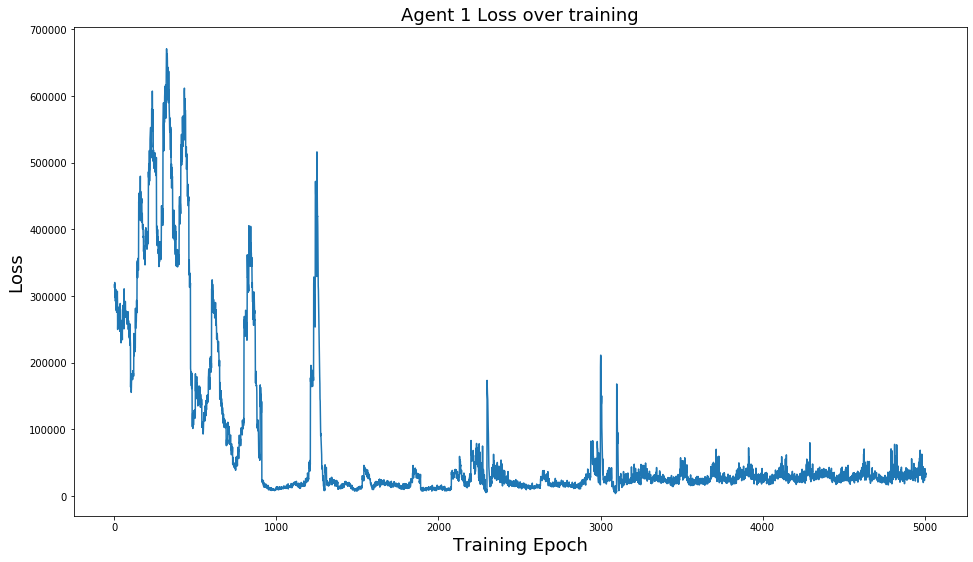

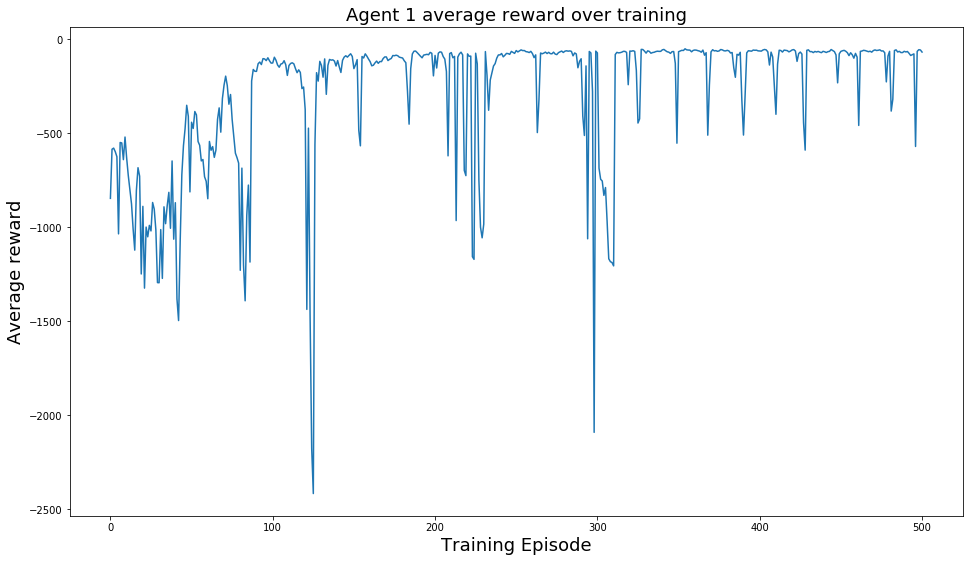

In [12]:
## AGENT TRAINING RESULTS
# Path to results folder
results_path = os.path.join(vissim_working_directory, model_name, "Agents_Results", agent_type, Session_ID)

# Loop over each agent
for idx , agent in Balance_int_MultiDQN_Agents.Agents.items():
    intersection_number_in_vissim = Balance_int_MultiDQN_Agents.Agents[0].signal_id + 1
    print("Intersection "+str(intersection_number_in_vissim))
    
    ## SAVE TRAINING DATA TO JSON.
    json_filename = "Agent{}_Loss_average_reward.json".format(intersection_number_in_vissim)
    Loss_reward = dict()   
    # Loss dictionary
    for epoch, loss in enumerate(agent.loss):
        loss_dict = { epoch : loss }
    Loss_reward['Agent{} loss'.format(intersection_number_in_vissim)] = loss_dict
    # Reward dictionary            
    episode = [i for i in range(len(agent.reward_storage))]
    Loss_reward['Agent{} Average_Reward'.format(intersection_number_in_vissim)] = agent.reward_storage
    # Store as JSON
    with open(results_path + "/" + json_filename, 'w') as f:
        json.dump(Loss_reward, f)
    print("Agent {}: Training Loss and Average Reward during training successfuly saved to file:".format(intersection_number_in_vissim))
    print(results_path + "/" + json_filename)
    
    ## LOADING DATA FROM JSON
    #results_path = os.path.join(vissim_working_directory, model_name, "Agents_Results", agent_type, Session_ID)
    #dictionary_filename = "Agent{}_Loss_average_reward.json".format(intersection_number_in_vissim)
    #with open(results_path + "/" + json_filename, 'r') as fp:
    #    data = json.load(fp)
    #print(data)
    
    ## TRAINING PLOTS
    loss_plot_filename  = "Agent{}_Loss.png".format(intersection_number_in_vissim)
    reward_plot_filename  = "Agent{}_average_reward.png".format(intersection_number_in_vissim) 
    
    ## Loss Plot
    plt.figure('LossAgent'+str(idx),figsize=(16,9))
    plt.plot(agent.loss)
    plt.xlabel('Training Epoch',fontsize=18)
    plt.ylabel('Loss',fontsize=18)
    plt.title('Agent {} Loss over training'.format(intersection_number_in_vissim),fontsize=18)
    plt.savefig(results_path + "/" + loss_plot_filename)

    ## Average Reward Plot
    plt.figure('RewardAgent'+str(idx),figsize=(16,9))
    plt.plot(agent.reward_storage)
    plt.xlabel('Training Episode',fontsize=18)
    plt.ylabel('Average reward',fontsize=18)
    plt.title('Agent {} average reward over training'.format(intersection_number_in_vissim),fontsize=18)
    plt.savefig(results_path + "/" + reward_plot_filename)
    

In [ ]:
Balance_int_MultiDQN_Agents.load(500, best = True)

In [ ]:
Balance_int_MultiDQN_Agents.demo()

In [ ]:
Episode_Queues, Cumulative_Episode_Delays,Cumulative_Episode_stop_Delays, Cumulative_Totale_network_delay,Cumulative_Totale_network_stop_delay  = Balance_int_MultiDQN_Agents.test()

In [ ]:
results_path = os.path.join(vissim_working_directory, model_name, "Agents_Results", agent_type, Session_ID)
time = [t for t in range(len(Cumulative_Totale_network_stop_delay))]

########################################
## Queues over time for each junction ##
########################################
for idx, queues in Episode_Queues.items():
    # Identify Junction ID in map
    intersection_number_in_vissim = Balance_int_MultiDQN_Agents.Agents[0].signal_id + 1
    
    queues = np.array(queues)
    queues = queues.T
    number_queues = np.size(queues,0)
    
    plt.figure('1'+str(idx),figsize=(16, 9))
    
    Queues = dict()
    Queues['Time'] = time
    Queues_legend = []
    
    for i, queue in enumerate(queues):
        plt.plot(queue, label = "Queue"+str(i))
        Queues[str(i)] = queue.tolist()
        Queues_legend.append("Queue"+str(i))
    
    ## Plot the queues
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Queue Length',fontsize=18)
    plt.title('Junction {} Queue length'.format(intersection_number_in_vissim),fontsize=18)
    plt.gca().legend(Queues_legend)
    
    filename = "Junction{}_Queues.png".format(intersection_number_in_vissim)           
    plt.savefig(results_path + "/" + filename)
    
    # Store as JSON
    json_filename = "Junction{}_Queues.json".format(intersection_number_in_vissim)        
    with open(results_path + "/" + json_filename, 'w') as f:
        json.dump(Queues, f)
        
    ### LOADING DATA FROM JSON
    #results_path = os.path.join(vissim_working_directory, model_name, "Agents_Results", agent_type, Session_ID)
    #json_filename = "Junction{}_Queues.json".format(intersection_number_in_vissim)
    #with open(results_path + "/" + json_filename, 'r') as fp:
    #    data = json.load(fp)
    #print(data)
        
    # Success Message
    print("Agent {}: Queues during Test successfuly saved to file:".format(intersection_number_in_vissim))
    print(results_path + "/" + json_filename)
       
        
###################################################        
## Accumulated delay over time for each junction ##
###################################################
for idx, delay in Cumulative_Episode_Delays.items():
    # Identify Junction ID in map
    intersection_number_in_vissim = Balance_int_MultiDQN_Agents.Agents[idx].signal_id + 1

    # Extract and process delay data
    Delay = dict()   
    Delay['Time'] = time
    Delay['Junction {} delay'.format(intersection_number_in_vissim)] = delay
    
    # Store as JSON
    json_filename = "Junction{}_Cumulative_Delay.json".format(intersection_number_in_vissim)        
    with open(results_path + "/" + json_filename, 'w') as f:
        json.dump(Delay, f)
        
    # Success Message
    print("Agent {}: Test Cumulative Delay successfuly saved to file:".format(intersection_number_in_vissim))
    print(results_path + "/" + json_filename)
    
    ### Loading data from JSON
    #results_path = os.path.join(vissim_working_directory, model_name, "Agents_Results", agent_type, Session_ID)
    #dictionary_filename = "Junction{}_Cumulative_Delay.json".format(intersection_number_in_vissim)
    #with open(results_path + "/" + json_filename, 'r') as fp:
    #    data = json.load(fp)
    #print(data)

    # Plot the cumulative delay
    plt.figure('2'+str(idx),figsize=(16, 9))
    plt.plot(delay)
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Accumulated Delay',fontsize=18)
    plt.title('Junction {} Delay'.format(intersection_number_in_vissim),fontsize=18)
    plt.gca().legend('Junction accumulated delay')
    
    filename = "Junction{}_Cumulative_Delay.png".format(intersection_number_in_vissim)
    plt.savefig(results_path + "/" + filename)
    
    
    
########################################################    
## Accumulated stop delay over time for each junction ##
########################################################
for idx, stop_delay in Cumulative_Episode_stop_Delays.items():
    # Identify Junction ID in map
    intersection_number_in_vissim = Balance_int_MultiDQN_Agents.Agents[idx].signal_id + 1    
    
    # Extract and process stop delay data
    Stop_delay = dict()   
    Stop_delay['Time'] = time
    Stop_delay['Junction {} stop delay'.format(intersection_number_in_vissim)] = stop_delay
    
    # Store as JSON
    json_filename = "Junction{}_Cumulative_Stop_Delay.json".format(intersection_number_in_vissim)        
    with open(results_path + "/" + json_filename, 'w') as f:
        json.dump(Stop_delay, f)
    
    # Success Message
    print("Agent {}: Test Cumulative Stop Delay successfuly saved to file:".format(intersection_number_in_vissim))
    print(results_path + "/" + json_filename)
        
    ### Loading data from JSON
    #results_path = os.path.join(vissim_working_directory, model_name, "Agents_Results", agent_type, Session_ID)
    #dictionary_filename = "Junction{}_Cumulative_Stop_Delay.json".format(intersection_number_in_vissim)
    #with open(results_path + "/" + json_filename, 'r') as fp:
    #    data = json.load(fp)
    #print(data)
    
    # Plot the cumulative stop delay
    plt.figure('3'+str(idx),figsize=(16, 9))
    plt.plot(stop_delay)
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Accumulated Stop Delay',fontsize=18)
    plt.title('Junction {} Stop Delay'.format(intersection_number_in_vissim),fontsize=18)
    plt.gca().legend('Junction accumulated Stop delay')
    
    filename = "Junction{}_Cumulative_Stop_Delay.png".format(intersection_number_in_vissim)
    plt.savefig(results_path + "/" + filename)

    
    
###############################################
## ONLY IF THERE IS MORE THAN ONE CONTROLLER ##
##    These are the global network plots     ##
###############################################

if len(Balance_int_MultiDQN_Agents.Agents) > 1:
    ########################################    
    ## Global Accumulated delay over time ##
    ########################################
    
    # Process global delay data
    Global_delay = dict()   
    Global_delay['Time'] = time
    Global_delay['Global accumulated Delay'] = Cumulative_Totale_network_delay
    
    # Store as JSON
    json_filename = "Global_Cumulative_Delay.json"
    with open(results_path + "/" + json_filename, 'w') as f:
        json.dump(Global_delay, f)
    
    # Success Message
    print("Agent {}: Test Cumulative Global Delay successfuly saved to file:")
    print(results_path + "/" + json_filename)
        
    ### Loading data from JSON
    #results_path = os.path.join(vissim_working_directory, model_name, "Agents_Results", agent_type, Session_ID)
    #dictionary_filename = "Global_Cumulative_Delay.json"
    #with open(results_path + "/" + json_filename, 'r') as fp:
    #    data = json.load(fp)
    #print(data)

    
    # Plot the global delay
    plt.figure('4',figsize=(16,9))
    plt.plot(Cumulative_Totale_network_delay)
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Global accumulated Delay',fontsize=18)
    plt.title('Global accumulated Delay',fontsize=18)
    plt.gca().legend('Global accumulated delay')

    filename = "Global_Cumulative_Delay.png".format(intersection_number_in_vissim)
    plt.savefig(results_path + "/" + filename)


    #############################################
    ## Global Accumulated stop delay over time ##
    #############################################
    
    # Process global stop delay data
    Global_stop_delay = dict()   
    Global_stop_delay['Time'] = time
    Global_stop_delay['Global accumulated stop Delay'] = Cumulative_Totale_network_stop_delay
    
    # Store as JSON
    json_filename = "Global_Cumulative_Stop_Delay.json"
    with open(results_path + "/" + json_filename, 'w') as f:
        json.dump(Global_stop_delay, f)
    
    # Success Message
    print("Agent {}: Test Cumulative Global Stop Delay successfuly saved to file:")
    print(results_path + "/" + json_filename)
        
    ### Loading data from JSON
    #results_path = os.path.join(vissim_working_directory, model_name, "Agents_Results", agent_type, Session_ID)
    #dictionary_filename = "Global_Cumulative_Stop_Delay.json"
    #with open(results_path + "/" + json_filename, 'r') as fp:
    #    data = json.load(fp)
    #print(data)

    # Plot the global stop delay
    plt.figure('5'+str(idx),figsize=(16, 9))
    plt.plot(Cumulative_Totale_network_stop_delay)
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Global accumulated stop Delay',fontsize=18)
    plt.title('Global accumulated stop Delay',fontsize=18)
    plt.gca().legend('Global accumulated stop Delay')
    
    filename = "Global_Cumulative_Delay.png".format(intersection_number_in_vissim)
    plt.savefig(results_path + "/" + filename)



# Balance RL DQN

In [ ]:
map_name  = 'Balance'
model_name = map_name

vissim_working_directory = 'C:\\Users\\acabrejasegea\\OneDrive - The Alan Turing Institute\\Desktop\\ATI\\0_TMF\\MLforFlowOptimisation\\Vissim\\'
#vissim_working_directory = "E:\\OneDrive - University of Warwick\\Desktop\\ATI\\0_TMF\\MLforFlowOptimisation\\Vissim"

## Simulation Parameters
Random_Seed = 44
sim_length = 3601
timesteps_per_second = 1
agent_type = "DQN"
actions = 'default_actions'     # 'default_actions' or 'all_actions'

## DQN Hyperaramenters
episodes = 500
copy_weights_frequency = 10

PER_activated = True
memory_size = 5000
batch_size = 128
batches_per_episode = 10

alpha = 0.00005
gamma = 0.95

# Load and partition balance dictionary
Balance_dictionary = balance_dictionary(agent_type)

Session_ID = map_name + "_" + actions + "_" + str(episodes) + "_" + str(sim_length-1) + "_" + agent_type
print("Current simulation: {}".format(Session_ID))

In [ ]:
# Exploration Schedule ("linear" or "geometric")
exploration_schedule = "geometric"
epsilon_start = 1
epsilon_end   = 0.001

Random_Seed = 100

def choose_schedule(exploration_schedule, espilon_start, epsilon_end, episodes):
    if exploration_schedule == "linear":
        epsilon_decay = 1.2*(epsilon_end - epsilon_start)/(episodes-1)
        epsilon_sequence = [1 + epsilon_decay * entry for entry in range(episodes+1)]
        epsilon_sequence = [0 if entry < 0 else entry for entry in epsilon_sequence]
    elif exploration_schedule == "geometric":
        epsilon_decay = np.power(epsilon_end/epsilon_start, 1./(episodes-1)) # Geometric decay
        epsilon_sequence = [epsilon_start * epsilon_decay ** entry for entry in range(episodes+1)]
    elif exploration_schedule == "entropy":
        pass
    else:
        print("ERROR: Unrecognized choice of exploration schedule.")
        
    # Plotting exploration schedule
    plt.figure(figsize=(8,4.5))
    x_series = np.array(range(1,episodes+1))
    y_series = epsilon_sequence[0:episodes]
    plt.plot(x_series, y_series, '-b')
    plt.xlabel('Episodes')
    plt.ylabel('Ratio of random exploration')
    plt.title('Exploration schedule')
    plt.show()
    return(epsilon_sequence)

epsilon_sequence = choose_schedule(exploration_schedule, epsilon_start, epsilon_end, episodes)


In [ ]:
Balance_MultiDQN_Agents = MasterDQN_Agent(model_name, vissim_working_directory, sim_length, Balance_dictionary, actions,\
                gamma, alpha, agent_type, memory_size, PER_activated, batch_size, batches_per_episode, copy_weights_frequency, epsilon_sequence,\
                Random_Seed, timesteps_per_second, Session_ID, verbose = True)

In [ ]:
Balance_MultiDQN_Agents.prepopulate_memory()

In [ ]:
Balance_MultiDQN_Agents.train(episodes)

In [ ]:
Balance_MultiDQN_Agents.save(500)

In [ ]:
Balance_MultiDQN_Agents.demo()

In [ ]:
# For the agent training
ploty = 1
for idx , agent in Balance_MultiDQN_Agents.Agents.items():
    print("Agent "+str(idx))
    #print(ploty)
    #plt.subplot(14, 2, ploty)

    plt.figure('6'+str(idx),figsize=(4.5, 3))
    
    Loss_rewarddf = pd.DataFrame()   
    
    plt.plot(agent.loss)
    plt.xlabel('Episode',fontsize=18)
    plt.ylabel('Loss',fontsize=18)
    plt.title('Agent{} Loss over training'.format(idx),fontsize=18)
    plt.gca().legend('Agent Loss over training')
    
    Path  = os.path.join(vissim_working_directory, model_name, "DQN", \
                        "Agent{}_Loss.png".format(idx)) 
    #plt.savefig(Path)
    
    csv_Path = os.path.join(vissim_working_directory, model_name, "DQN", \
                           "Agent{}_Loss_average_reward.csv".format(idx)) 
    ploty+=1
    #print(ploty)

    
    #plt.subplot(14, 2, ploty)
    plt.figure('7'+str(idx),figsize=(4.5, 3))
    plt.plot(agent.reward_storage)
    plt.xlabel('Episode',fontsize=18)
    plt.ylabel('Average reward',fontsize=18)
    plt.title('Agent{} average reward over training'.format(idx),fontsize=18)
    plt.gca().legend('Agent reward over training')
    
    Path  = os.path.join(vissim_working_directory, model_name, "DQN", Session_ID,\
                        "Agent{}_average_reward.png".format(idx)) 
    #plt.savefig(Path)
    
    
    episode = [i for i in range(len(agent.reward_storage))]
    
    Loss_rewarddf['episode'] = episode 
    Loss_rewarddf['Agent{} loss'.format(idx)] = agent.loss
    Loss_rewarddf['Agent{} Average_Reward'.format(idx)] = agent.reward_storage
    
    #Loss_rewarddf.to_csv(csv_Path,index=False)
    ploty+=1
    

In [ ]:
Episode_Queues, Cumulative_Episode_Delays,Cumulative_Episode_stop_Delays, Cumulative_Totale_network_delay,Cumulative_Totale_network_stop_delay  = Balance_MultiDQN_Agents.test()

In [ ]:
time = [t for t in range(len(Cumulative_Totale_network_stop_delay))]

# Queues ovzer time for each junction
for idx, queues in Episode_Queues.items():
    queues = np.array(queues)
    queues = queues.T
    
    plt.figure('1'+str(idx),figsize=(16, 9))
    
    Queuesdf = pd.DataFrame()
    
    Queuesdf['Time'] = time
    Queues_legend = []
    
    for i, queue in enumerate(queues):
        plt.plot(queue, label = "Queue"+str(i))
        Queuesdf[str(i)] = queue
        Queues_legend.append("Queue"+str(i))
        
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Queue Length',fontsize=18)
    plt.title('Junction {} Queue length'.format(idx),fontsize=18)
    #plt.gca().legend(Queues_legend)
    
    Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Queues.png".format(idx))               
    plt.savefig(Path)
    
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Queues.csv".format(idx))        
   
    Queuesdf.to_csv(csv_Path,index=False)
    plt.legend()
        
        
# Accumulated delay over time for each junction
for idx, delay in Cumulative_Episode_Delays.items():
    
    plt.figure('2'+str(idx),figsize=(16, 9))
    
    delaydf = pd.DataFrame()   
    delaydf['Time'] = time
    delaydf['Junction {} delay'.format(idx)] = delay
    
    plt.plot(delay)
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Accumulated Delay',fontsize=18)
    plt.title('Junction {} Delay'.format(idx),fontsize=18)
    plt.gca().legend('Junction accumulated delay')
    
    Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                            "Junction{}_Cumulative_Delay.png".format(idx))
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Cumulative_Delay.csv".format(idx))   
    plt.savefig(Path)

    delaydf.to_csv(csv_Path,index=False)
    
    
# Accumulated stop delay over time for each junction
for idx, stop_delay in Cumulative_Episode_stop_Delays.items():
    
    plt.figure('3'+str(idx),figsize=(16, 9))
    
    stop_delaydf = pd.DataFrame()   
    stop_delaydf['Time'] = time
    stop_delaydf['Junction {} stop delay'.format(idx)] = stop_delay

    plt.plot(stop_delay)
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Accumulated Stop Delay',fontsize=18)
    plt.title('Junction {} Stop Delay'.format(idx),fontsize=18)
    plt.gca().legend('Junction accumulated Stop delay')
    
    Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                            "Junction{}_Cumulative_stop_Delay.png".format(idx))
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Cumulative_stop_Delay.csv".format(idx))
    plt.savefig(Path)
    stop_delaydf.to_csv(csv_Path,index=False)
    
# Global Accumulated delay over time
plt.figure('4',figsize=(16,9))


Global_delaydf = pd.DataFrame()   
Global_delaydf['Time'] = time
Global_delaydf['Global accumulated Delay'] = Cumulative_Totale_network_delay

plt.plot(Cumulative_Totale_network_delay)
plt.xlabel('Time [s]',fontsize=18)
plt.ylabel('Global accumulated Delay',fontsize=18)
plt.title('Global accumulated Delay',fontsize=18)
plt.gca().legend('Global accumulated delay')

Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_Delay.png")
csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_Delay.csv")
plt.savefig(Path)
Global_delaydf.to_csv(csv_Path,index=False)

# Global Accumulated stop delay over time
plt.figure('5'+str(idx),figsize=(16, 9))

Global_stop_delaydf = pd.DataFrame()   
Global_stop_delaydf['Time'] = time
Global_stop_delaydf['Global accumulated stop Delay'] = Cumulative_Totale_network_stop_delay

plt.plot(Cumulative_Totale_network_stop_delay)
plt.xlabel('Time [s]',fontsize=18)
plt.ylabel('Global accumulated stop Delay',fontsize=18)
plt.title('Global accumulated stop Delay',fontsize=18)
plt.gca().legend('Global accumulated stop Delay')

Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_stop_Delay.png")
csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_stop_Delay.csv")
plt.savefig(Path)
Global_stop_delaydf.to_csv(csv_Path,index=False)

In [ ]:
Balance_MultiDQN_Agents.load(498, best = True)

In [ ]:
Balance_MultiDQN_Agents.demo()

# Single_Cross_Straight AC

---> The lack of speed comes from the size of the model (particularly the change of color of the heads). 

In [ ]:
model_name  = 'Single_Cross_Straight'
vissim_working_directory =  'C:\\Users\\Rzhang\\Desktop\\MLforFlowOptimisationOrigine\\Vissim\\'
sim_length = 3601

agent_type = "AC"
Session_ID = "Single_Cross_Straigth_AC"



# all controller actions
Single_Cross_Straight_dictionary =\
{'junctions' : {
    # Controller Number 0 
    0 : {'default_actions' : {     0 : [1, 0, 1, 0],
                                     1 : [0, 1, 0, 1]
        },
         
         'all_actions' : {     0 : [1, 0, 1, 0],
                                     1 : [0, 1, 0, 1]
        },
 
         'link' : [1, 3, 5, 7],
         'lane' : ['1-1', '3-1', '5-1', '7-1'],
         'agent_type' : agent_type,
         'controled_by_com' : True,
         'green_time' : 6,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [5],
         'state_type' : 'QueuesSig',
         'reward_type' : 'Queues' }
        },
 'demand' : { 'default' : [400, 400, 400, 400],
             
             0 : [200,200,200,200],
             1 : [400,400,400,400],
             2 : [900,500,900,500],
             3 : [1000,500,1000,500],
             4 : [700,500,700,500],
             5 : [500,700,500,700],
             6 : [500,1000,500,1000],
             7 : [500,900,500,900],
             8 : [400,400,400,400],
             9 : [200,200,200,200]
            }
 
}

In [ ]:
gamma = 0.95
alpha = 0.00001


value = 0.5
entropy = 0.5
n_step_size = 16
state_size = [5]
reduce_entropy_every = 100
Random_Seed = 100



# for the monitoring
horizon = 50
n_sample = 10


In [ ]:
Single_Cross_Straight_MultiAC_Agents = MasterAC_Agent(model_name, vissim_working_directory, sim_length, Single_Cross_Straight_dictionary,\
                n_step_size, gamma, alpha, entropy, value, \
                Random_Seed = Random_Seed, timesteps_per_second = 1, Session_ID = Session_ID, verbose = True, \
                 horizon = horizon, n_sample = n_sample)

In [ ]:
Single_Cross_Straight_MultiAC_Agents.train(200) 

In [ ]:
Single_Cross_Straight_MultiAC_Agents.save(401)


In [ ]:
Single_Cross_Straight_MultiAC_Agents.load(200, best = True)
            
            
            
        
            

In [ ]:
Episode_Queues, Cumulative_Episode_Delays,Cumulative_Episode_stop_Delays, Cumulative_Totale_network_delay,Cumulative_Totale_network_stop_delay = Single_Cross_Straight_MultiAC_Agents.test()

In [ ]:
time = [t for t in range(len(Cumulative_Totale_network_stop_delay))]

# Queues ovzer time for each junction
for idx, queues in Episode_Queues.items():
    queues = np.array(Episode_Queues[0])
    queues = queues.T
    
    plt.figure('1'+str(idx),figsize=(16, 9))
    
    Queuesdf = pd.DataFrame()
    
    Queuesdf['Time'] = time
    Queues_legend = []
    
    for i, queue in enumerate(queues):
        plt.plot(queue)
        Queuesdf[str(i)] = queue
        Queues_legend.append("Queue"+str(i))
        
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Queue Length',fontsize=18)
    plt.title('Junction {} Queue length'.format(idx),fontsize=18)
    plt.gca().legend(Queues_legend)
    
    Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Queues.png".format(idx))               
    plt.savefig(Path)
    
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Queues.csv".format(idx))        
   
    Queuesdf.to_csv(csv_Path,index=False)
        
        
# Accumulated delay over time for each junction
for idx, delay in Cumulative_Episode_Delays.items():
    
    plt.figure('2'+str(idx),figsize=(16, 9))
    
    delaydf = pd.DataFrame()   
    delaydf['Time'] = time
    delaydf['Junction {} delay'.format(idx)] = delay
    
    plt.plot(delay)
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Accumulated Delay',fontsize=18)
    plt.title('Junction {} Delay'.format(idx),fontsize=18)
    plt.gca().legend('Junction accumulated delay')
    
    Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                            "Junction{}_Cumulative_Delay.png".format(idx))
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Cumulative_Delay.csv".format(idx))   
    plt.savefig(Path)

    delaydf.to_csv(csv_Path,index=False)
    
    
# Accumulated stop delay over time for each junction
for idx, stop_delay in Cumulative_Episode_stop_Delays.items():
    
    plt.figure('3'+str(idx),figsize=(16, 9))
    
    stop_delaydf = pd.DataFrame()   
    stop_delaydf['Time'] = time
    stop_delaydf['Junction {} stop delay'.format(idx)] = stop_delay

    plt.plot(stop_delay)
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Accumulated Stop Delay',fontsize=18)
    plt.title('Junction {} Stop Delay'.format(idx),fontsize=18)
    plt.gca().legend('Junction accumulated Stop delay')
    
    Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                            "Junction{}_Cumulative_stop_Delay.png".format(idx))
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Cumulative_stop_Delay.csv".format(idx))
    plt.savefig(Path)
    stop_delaydf.to_csv(csv_Path,index=False)
    
# Global Accumulated delay over time
plt.figure('4',figsize=(16,9))


Global_delaydf = pd.DataFrame()   
Global_delaydf['Time'] = time
Global_delaydf['Global accumulated Delay'] = Cumulative_Totale_network_delay

plt.plot(Cumulative_Totale_network_delay)
plt.xlabel('Time [s]',fontsize=18)
plt.ylabel('Global accumulated Delay',fontsize=18)
plt.title('Global accumulated Delay',fontsize=18)
plt.gca().legend('Global accumulated delay')

Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_Delay.png")
csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_Delay.csv")
plt.savefig(Path)
Global_delaydf.to_csv(csv_Path,index=False)

# Global Accumulated stop delay over time
plt.figure('5'+str(idx),figsize=(16, 9))

Global_stop_delaydf = pd.DataFrame()   
Global_stop_delaydf['Time'] = time
Global_stop_delaydf['Global accumulated stop Delay'] = Cumulative_Totale_network_stop_delay

plt.plot(Cumulative_Totale_network_stop_delay)
plt.xlabel('Time [s]',fontsize=18)
plt.ylabel('Global accumulated stop Delay',fontsize=18)
plt.title('Global accumulated stop Delay',fontsize=18)
plt.gca().legend('Global accumulated stop Delay')

Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_stop_Delay.png")
csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_stop_Delay.csv")
plt.savefig(Path)
Global_stop_delaydf.to_csv(csv_Path,index=False)


# For the agent training

for idx , agent in  Single_Cross_Straight_MultiAC_Agents.Agents.items():  
    plt.figure('6'+str(idx),figsize=(16, 9))
    
    Loss_rewarddf = pd.DataFrame()   
    
    plt.plot(agent.loss)
    plt.xlabel('Episode',fontsize=18)
    plt.ylabel('Loss',fontsize=18)
    plt.title('Agent{} Loss over training'.format(idx),fontsize=18)
    plt.gca().legend('Agent Loss over training')
    
    Path  = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Agent{}_Loss.png".format(idx)) 
    plt.savefig(Path)
    
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                           "Agent{}_Loss_average_reward.csv".format(idx)) 
    
    
    plt.figure('7'+str(idx),figsize=(16, 9))
    plt.plot(agent.reward_storage)
    plt.xlabel('Episode',fontsize=18)
    plt.ylabel('Average reward',fontsize=18)
    plt.title('Agent{} average reward over training'.format(idx),fontsize=18)
    plt.gca().legend('Agent reward over training')
    
    Path  = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Agent{}_average_reward.png".format(idx)) 
    plt.savefig(Path)
    
    
    episode = [i for i in range(len(agent.reward_storage))]
    
    Loss_rewarddf['episode'] = episode 
    Loss_rewarddf['Agent{} loss'.format(idx)] = agent.loss
    Loss_rewarddf['Agent{} Average_Reward'.format(idx)] = agent.reward_storage
    
    Loss_rewarddf.to_csv(csv_Path,index=False)

In [ ]:
Single_Cross_Straight_MultiAC_Agents.Agents[0].Loss

In [ ]:
Single_Cross_Straight_MultiAC_Agents.demo()

# Single_Cross_Straight DQN

In [ ]:
model_name  = 'Single_Cross_Straight'
vissim_working_directory =  'C:\\Users\\Rzhang\\Desktop\\MLforFlowOptimisationOrigine\\Vissim\\'
sim_length = 3601

agent_type = "DuelingDQN"
Session_ID = "Single_Cross_Straigth_DuelingDQN20c0"

# all controller actions
# all controller actions
Single_Cross_Straight_dictionary =\
{'junctions' : {
    # Controller Number 0 
    0 : {'default_actions' : {     0 : [1, 0, 1, 0],
                                     1 : [0, 1, 0, 1]
        },
         
         'all_actions' : {     0 : [1, 0, 1, 0],
                                     1 : [0, 1, 0, 1]
        },
 
         'link' : [1, 3, 5, 7],
         'lane' : ['1-1', '3-1', '5-1', '7-1'],
         'agent_type' : agent_type,
         'controled_by_com' : True,
         'green_time' : 6,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [5],
         'state_type' : 'QueuesSig',
         'reward_type' : 'Queues',
         'queues_counter_ID' : [1,2,3,4]  }
        },
 'demand' : { 'default' : [400, 400, 400, 400],
             
             0 : [200,200,200,200],
             1 : [400,400,400,400],
             2 : [900,500,900,500],
             3 : [1000,500,1000,500],
             4 : [700,500,700,500],
             5 : [500,700,500,700],
             6 : [500,1000,500,1000],
             7 : [500,900,500,900],
             8 : [400,400,400,400],
             9 : [200,200,200,200]
            }
 
}

## DQN Hyperaramenters
episodes = 300
copy_weights_frequency = 10

PER_activated = True
memory_size = 1000
batch_size = 128

gamma = 0.95
alpha = 0.005

In [ ]:
# Exploration Schedule ("linear" or "geometric")
exploration_schedule = "geometric"
epsilon_start = 1
epsilon_end   = 0.001

Random_Seed = 100

def choose_schedule(exploration_schedule, espilon_start, epsilon_end, episodes):
    if exploration_schedule == "linear":
        epsilon_decay = 1.2*(epsilon_end - epsilon_start)/(episodes-1)
        epsilon_sequence = [1 + epsilon_decay * entry for entry in range(episodes+1)]
        epsilon_sequence = [0 if entry < 0 else entry for entry in epsilon_sequence]
    elif exploration_schedule == "geometric":
        epsilon_decay = np.power(epsilon_end/epsilon_start, 1./(episodes-1)) # Geometric decay
        epsilon_sequence = [epsilon_start * epsilon_decay ** entry for entry in range(episodes+1)]
    elif exploration_schedule == "entropy":
        pass
    else:
        print("ERROR: Unrecognized choice of exploration schedule.")
        
    # Plotting exploration schedule
    plt.figure(figsize=(8,4.5))
    x_series = np.array(range(1,episodes+1))
    y_series = epsilon_sequence[0:episodes]
    plt.plot(x_series, y_series, '-b')
    plt.xlabel('Episodes')
    plt.ylabel('Ratio of random exploration')
    plt.title('Exploration schedule')
    plt.show()
    return(epsilon_sequence)

epsilon_sequence = choose_schedule(exploration_schedule, epsilon_start, epsilon_end, episodes)

In [ ]:
Single_Cross_Straight_MultiDQN_Agents = MasterDQN_Agent(model_name, vissim_working_directory, sim_length, Single_Cross_Straight_dictionary,\
                gamma, alpha, agent_type, memory_size, PER_activated, batch_size, copy_weights_frequency, epsilon_sequence,\
                Random_Seed = Random_Seed, timesteps_per_second = 1, Session_ID = Session_ID, verbose = True)

In [ ]:
Single_Cross_Straight_MultiDQN_Agents.prepopulate_memory()

In [ ]:
Single_Cross_Straight_MultiDQN_Agents.train(episodes)

In [ ]:
Single_Cross_Straight_MultiDQN_Agents.save(401)

In [ ]:
Single_Cross_Straight_MultiDQN_Agents.load(300 , best = True)

In [ ]:
Episode_Queues, Cumulative_Episode_Delays,Cumulative_Episode_stop_Delays, Cumulative_Totale_network_delay,Cumulative_Totale_network_stop_delay  = Single_Cross_Straight_MultiDQN_Agents.test()

In [ ]:
time = [t for t in range(len(Cumulative_Totale_network_stop_delay))]

# Queues ovzer time for each junction
for idx, queues in Episode_Queues.items():
    queues = np.array(Episode_Queues[0])
    queues = queues.T
    
    plt.figure('1'+str(idx),figsize=(16, 9))
    
    Queuesdf = pd.DataFrame()
    
    Queuesdf['Time'] = time
    Queues_legend = []
    
    for i, queue in enumerate(queues):
        plt.plot(queue)
        Queuesdf[str(i)] = queue
        Queues_legend.append("Queue"+str(i))
        
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Queue Length',fontsize=18)
    plt.title('Junction {} Queue length'.format(idx),fontsize=18)
    plt.gca().legend(Queues_legend)
    
    Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Queues.png".format(idx))               
    plt.savefig(Path)
    
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Queues.csv".format(idx))        
   
    Queuesdf.to_csv(csv_Path,index=False)
        
        
# Accumulated delay over time for each junction
for idx, delay in Cumulative_Episode_Delays.items():
    
    plt.figure('2'+str(idx),figsize=(16, 9))
    
    delaydf = pd.DataFrame()   
    delaydf['Time'] = time
    delaydf['Junction {} delay'.format(idx)] = delay
    
    plt.plot(delay)
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Accumulated Delay',fontsize=18)
    plt.title('Junction {} Delay'.format(idx),fontsize=18)
    plt.gca().legend('Junction accumulated delay')
    
    Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                            "Junction{}_Cumulative_Delay.png".format(idx))
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Cumulative_Delay.csv".format(idx))   
    plt.savefig(Path)

    delaydf.to_csv(csv_Path,index=False)
    
    
# Accumulated stop delay over time for each junction
for idx, stop_delay in Cumulative_Episode_stop_Delays.items():
    
    plt.figure('3'+str(idx),figsize=(16, 9))
    
    stop_delaydf = pd.DataFrame()   
    stop_delaydf['Time'] = time
    stop_delaydf['Junction {} stop delay'.format(idx)] = stop_delay

    plt.plot(stop_delay)
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Accumulated Stop Delay',fontsize=18)
    plt.title('Junction {} Stop Delay'.format(idx),fontsize=18)
    plt.gca().legend('Junction accumulated Stop delay')
    
    Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                            "Junction{}_Cumulative_stop_Delay.png".format(idx))
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Cumulative_stop_Delay.csv".format(idx))
    plt.savefig(Path)
    stop_delaydf.to_csv(csv_Path,index=False)
    
# Global Accumulated delay over time
plt.figure('4',figsize=(16,9))


Global_delaydf = pd.DataFrame()   
Global_delaydf['Time'] = time
Global_delaydf['Global accumulated Delay'] = Cumulative_Totale_network_delay

plt.plot(Cumulative_Totale_network_delay)
plt.xlabel('Time [s]',fontsize=18)
plt.ylabel('Global accumulated Delay',fontsize=18)
plt.title('Global accumulated Delay',fontsize=18)
plt.gca().legend('Global accumulated delay')

Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_Delay.png")
csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_Delay.csv")
plt.savefig(Path)
Global_delaydf.to_csv(csv_Path,index=False)

# Global Accumulated stop delay over time
plt.figure('5'+str(idx),figsize=(16, 9))

Global_stop_delaydf = pd.DataFrame()   
Global_stop_delaydf['Time'] = time
Global_stop_delaydf['Global accumulated stop Delay'] = Cumulative_Totale_network_stop_delay

plt.plot(Cumulative_Totale_network_stop_delay)
plt.xlabel('Time [s]',fontsize=18)
plt.ylabel('Global accumulated stop Delay',fontsize=18)
plt.title('Global accumulated stop Delay',fontsize=18)
plt.gca().legend('Global accumulated stop Delay')

Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_stop_Delay.png")
csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_stop_Delay.csv")
plt.savefig(Path)
Global_stop_delaydf.to_csv(csv_Path,index=False)


# For the agent training

for idx , agent in  Single_Cross_Straight_MultiDQN_Agents.Agents.items():  
    plt.figure('6'+str(idx),figsize=(16, 9))
    
    Loss_rewarddf = pd.DataFrame()   
    
    plt.plot(agent.loss)
    plt.xlabel('Episode',fontsize=18)
    plt.ylabel('Loss',fontsize=18)
    plt.title('Agent{} Loss over training'.format(idx),fontsize=18)
    plt.gca().legend('Agent Loss over training')
    
    Path  = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Agent{}_Loss.png".format(idx)) 
    plt.savefig(Path)
    
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                           "Agent{}_Loss_average_reward.csv".format(idx)) 
    
    
    plt.figure('7'+str(idx),figsize=(16, 9))
    plt.plot(agent.reward_storage)
    plt.xlabel('Episode',fontsize=18)
    plt.ylabel('Average reward',fontsize=18)
    plt.title('Agent{} average reward over training'.format(idx),fontsize=18)
    plt.gca().legend('Agent reward over training')
    
    Path  = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Agent{}_average_reward.png".format(idx)) 
    plt.savefig(Path)
    
    
    episode = [i for i in range(len(agent.reward_storage))]
    
    Loss_rewarddf['episode'] = episode 
    Loss_rewarddf['Agent{} loss'.format(idx)] = agent.loss
    Loss_rewarddf['Agent{} Average_Reward'.format(idx)] = agent.reward_storage
    
    Loss_rewarddf.to_csv(csv_Path,index=False)

In [ ]:
Single_Cross_Straight_MultiDQN_Agents.demo()

# Single_Cross_Triple 4 actions AC

In [ ]:
model_name  = 'Single_Cross_Triple'
vissim_working_directory =  'C:\\Users\\Rzhang\\Desktop\\MLforFlowOptimisationOrigine\\Vissim\\'
sim_length = 3600

agent_type = "AC"
Session_ID = "Single_Cross_TripleAC4test1"

# all controller actions
Single_Cross_Triple_dictionary4 =\
{\
    # Controller Number 0 
   'junctions' : {0 : {'default_actions' :  {    0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             },
         
         'all_actions' :        {            0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             },
 
         'link' : [1, 3, 5, 7],
         'lane' : ['1-1', '1-2', '1-3', '3-1', '3-2', '3-3', '5-1', '5-2', '5-3', '7-1', '7-2', '7-3'],
         
         'controled_by_com' : True,
         'agent_type' : agent_type,
         'green_time' : 6,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [13],
         'state_type' : 'QueuesSig',
         'reward_type' : 'Queues' 
         }
    },
   'demand' : {"default" : [400,400,400,400] }
}

In [ ]:
gamma = 0.85
alpha = 0.00005


value = 0.5
entropy = 5000
n_step_size = 4
state_size = [13]
reduce_entropy_every = 100
Random_Seed = 100



# for the monitoring
horizon = 50
n_sample = 10


In [ ]:
Single_Cross_Triple4_MultiAC_Agents = MasterAC_Agent(model_name, vissim_working_directory, sim_length, Single_Cross_Triple_dictionary4,\
                n_step_size, gamma, alpha, entropy, value, \
                Random_Seed = Random_Seed, timesteps_per_second = 1, Session_ID = Session_ID, verbose = True, \
                 horizon = horizon, n_sample = n_sample)

In [ ]:
Single_Cross_Triple4_MultiAC_Agents.train(400) 

In [ ]:
Single_Cross_Triple4_MultiAC_Agents.save(401)

In [ ]:
Single_Cross_Triple4_MultiAC_Agents.load(50, best = False)

In [ ]:
Episode_Queues, Cumulative_Episode_Delays, Cumulative_Totale_network_delay = Single_Cross_Triple4_MultiAC_Agents.test()

In [ ]:
Single_Cross_Triple4_MultiAC_Agents.demo()

# Single_Cross_Triple 4 action DQN

In [ ]:
model_name  = 'Single_Cross_Triple'
vissim_working_directory =  'C:\\Users\\Rzhang\\Desktop\\MLforFlowOptimisationOrigine\\Vissim\\'
sim_length = 3601

Session_ID = "Single_Cross_Triple4_actions"
#Session_ID = "DQN"

agent_type = "DuelingDDQN"

# all controller actions
Single_Cross_Triple_dictionary4 =\
{ 'junctions' : {
    # Controller Number 0 
    0 : {'default_actions' :    {    0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                     1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                     2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                     3 : [0,0,0,0,0,0,0,0,0,1,1,1]},
         
         
         'all_actions' :       {    0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                     1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                     2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                     3 : [0,0,0,0,0,0,0,0,0,1,1,1]},
         
 
         'link' : [1, 3, 5, 7],
         'lane' : ['1-1', '1-2', '1-3', '3-1', '3-2', '3-3', '5-1', '5-2', '5-3', '7-1', '7-2', '7-3'],
         'controled_by_com' : True,
         'agent_type' : agent_type,
         'green_time' : 6,
         'redamber_time' : 1,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [13],
         'state_type' : 'QueuesSig',
         'reward_type' : 'Queues' 
         },
        },
     'demand' : { 'default' : [400, 400, 400, 400]}
                  
}

In [ ]:
## DQN Hyperaramenters
episodes = 400
copy_weights_frequency = 5

PER_activated = True
memory_size = 1000
batch_size = 128

gamma = 0.95
alpha = 0.005

In [ ]:
# Exploration Schedule ("linear" or "geometric")
exploration_schedule = "geometric"
epsilon_start = 1
epsilon_end   = 0.001

Random_Seed = 100

def choose_schedule(exploration_schedule, espilon_start, epsilon_end, episodes):
    if exploration_schedule == "linear":
        epsilon_decay = 1.2*(epsilon_end - epsilon_start)/(episodes-1)
        epsilon_sequence = [1 + epsilon_decay * entry for entry in range(episodes+1)]
        epsilon_sequence = [0 if entry < 0 else entry for entry in epsilon_sequence]
    elif exploration_schedule == "geometric":
        epsilon_decay = np.power(epsilon_end/epsilon_start, 1./(episodes-1)) # Geometric decay
        epsilon_sequence = [epsilon_start * epsilon_decay ** entry for entry in range(episodes+1)]
    elif exploration_schedule == "entropy":
        pass
    else:
        print("ERROR: Unrecognized choice of exploration schedule.")
        
    # Plotting exploration schedule
    plt.figure(figsize=(8,4.5))
    x_series = np.array(range(1,episodes+1))
    y_series = epsilon_sequence[0:episodes]
    plt.plot(x_series, y_series, '-b')
    plt.xlabel('Episodes')
    plt.ylabel('Ratio of random exploration')
    plt.title('Exploration schedule')
    plt.show()
    return(epsilon_sequence)

epsilon_sequence = choose_schedule(exploration_schedule, epsilon_start, epsilon_end, episodes)

In [ ]:
Single_Cross_Triple4_MultiDQN_Agents = MasterDQN_Agent(model_name, vissim_working_directory, sim_length, Single_Cross_Triple_dictionary4,\
                gamma, alpha, agent_type, memory_size, PER_activated, batch_size, copy_weights_frequency, epsilon_sequence,\
                Random_Seed = Random_Seed, timesteps_per_second = 1, Session_ID = Session_ID, verbose = True)

In [ ]:
Single_Cross_Triple4_MultiDQN_Agents.prepopulate_memory()

In [ ]:
Single_Cross_Triple4_MultiDQN_Agents.train(120)

In [ ]:
Single_Cross_Triple4_MultiDQN_Agents.save()

In [ ]:
Single_Cross_Triple4_MultiDQN_Agents.load(best = True)

In [ ]:
Episode_Queues, Cumulative_Episode_Delays, Cumulative_Totale_network_delay = Single_Cross_Triple4_MultiDQN_Agents.test()

In [ ]:
# To be arranged for multy agents

queues = np.array(Episode_Queues[0])
queues = queues.T

delay = Cumulative_Episode_Delays[0]

# Plot the queues
plt.figure(1)
for queue in queues:
    plt.plot(queue)

# plot the junctions delays
plt.figure(2)
plt.plot(delay)

#plot the total delays 
plt.figure(3)
plt.plot(Cumulative_Totale_network_delay)

# Dont freak out the 2 delays are not the same because the node is not covering all the junction

"""
Because the cars never leave the nodes the delay is not computed correctly (when the agent doesn't work) 
"""



In [ ]:
plt.figure(4)
plt.plot(Single_Cross_Triple4_MultiDQN_Agents.Agents[0].loss)

plt.figure(5)
plt.plot(Single_Cross_Triple4_MultiDQN_Agents.Agents[0].reward_storage)
print(Single_Cross_Triple4_MultiDQN_Agents.Agents[0].reward_storage)

In [ ]:
Single_Cross_Triple4_MultiDQN_Agents.demo()

# Single_Cross_Triple 8 actions AC

In [ ]:
model_name  = 'Single_Cross_Triple'
vissim_working_directory =  'C:\\Users\\Rzhang\\Desktop\\MLforFlowOptimisationOrigine\\Vissim\\'
sim_length = 3601

agent_type = "AC"
Session_ID = "Single_Cross_Triple8_actions_AC10"

# all controller actions
Single_Cross_Triple_dictionary8 =\
{\
    # Controller Number 0 
   'junctions' : {0 : {'default_actions' :  {    0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
         
         'all_actions' :        {            0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
 
         'link' : [1, 3, 5, 7],
         'lane' : ['1-1', '1-2', '1-3', '3-1', '3-2', '3-3', '5-1', '5-2', '5-3', '7-1', '7-2', '7-3'],
         
         'controled_by_com' : True,
         'agent_type' : agent_type,
         'green_time' : 6,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [13],
         'state_type' : 'QueuesSig',
         'reward_type' : 'Queues' ,
         'queues_counter_ID' : [1,2,3,4,5,6,7,8,9,10,11,12]             
         }
    },
   'demand' : { 'default' : [400, 400, 400, 400],
             
             0 : [300,300,300,300],
             1 : [600,600,600,600],
             2 : [1350,750,1350,750],
             3 : [1500,750,1500,750],
             4 : [1050,750,1050,750],
             5 : [750,1050,750,1050],
             6 : [750,1500,750,1500],
             7 : [750,1350,750,1350],
             8 : [600,600,600,600],
             9 : [300,300,300,300]
            }
}

In [ ]:
gamma = 0.95
alpha = 0.000001


value = 5
entropy = 500
n_step_size = 4
state_size = [13]
reduce_entropy_every = 100
Random_Seed = 100



# for the monitoring
horizon = 50
n_sample = 10


In [ ]:
Single_Cross_Triple8_MultiAC_Agents = MasterAC_Agent(model_name, vissim_working_directory, sim_length, Single_Cross_Triple_dictionary8,\
                n_step_size, gamma, alpha, entropy, value, \
                Random_Seed = Random_Seed, timesteps_per_second = 1, Session_ID = Session_ID, verbose = True, \
                 horizon = horizon, n_sample = n_sample)

In [ ]:
Single_Cross_Triple8_MultiAC_Agents.train(400) 

In [ ]:
Single_Cross_Triple8_MultiAC_Agents.save(401)

In [ ]:
Single_Cross_Triple8_MultiAC_Agents.load(50, best = False)

In [ ]:
Episode_Queues, Cumulative_Episode_Delays, Cumulative_Totale_network_delay = Single_Cross_Triple8_MultiAC_Agents.test()

In [ ]:
Single_Cross_Triple8_MultiAC_Agents.demo()

# Single_Cross_Triple 8 actions DQN

In [ ]:
model_name  = 'Single_Cross_Triple'
#vissim_working_directory =  'C:\\Users\\Rzhang\\Desktop\\MLforFlowOptimisationOrigine\\Vissim\\'
vissim_working_directory = 'C:\\Users\\acabrejasegea\\OneDrive - The Alan Turing Institute\\Desktop\\ATI\\0_TMF\\MLforFlowOptimisation\\Vissim\\'

sim_length = 3601

agent_type = "DuelingDDQN"
Session_ID = "Single_Cross_Triple8_actions_DuelingDDQN20c10"

# all controller actions
Single_Cross_Triple_dictionary8 =\
{\
    # Controller Number 0 
   'junctions' : {0 : {'default_actions' :  {    0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
         
         'all_actions' :        {            0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
 
         'link' : [1, 3, 5, 7],
         'lane' : ['1-1', '1-2', '1-3', '3-1', '3-2', '3-3', '5-1', '5-2', '5-3', '7-1', '7-2', '7-3'],
         
         'controled_by_com' : True,
         'agent_type' : agent_type,
         'green_time' : 6,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [13],
         'state_type' : 'QueuesSig',
         'reward_type' : 'Queues' ,
         'queues_counter_ID' : [1,2,3,4,5,6,7,8,9,10,11,12]             
         }
    },
   'demand' : { 'default' : [400, 400, 400, 400],
             
             0 : [300,300,300,300],
             1 : [600,600,600,600],
             2 : [1350,750,1350,750],
             3 : [1500,750,1500,750],
             4 : [1050,750,1050,750],
             5 : [750,1050,750,1050],
             6 : [750,1500,750,1500],
             7 : [750,1350,750,1350],
             8 : [600,600,600,600],
             9 : [300,300,300,300]
            }
}

In [ ]:
## DQN Hyperaramenters
episodes = 400 
copy_weights_frequency = 20 # On a successfull run I copied the weight every 50

PER_activated = True
memory_size = 1000
batch_size = 128

gamma = 0.95
alpha = 0.005

In [ ]:
# Exploration Schedule ("linear" or "geometric")
exploration_schedule = "geometric"
epsilon_start = 1
epsilon_end   = 0.001

Random_Seed = 100

def choose_schedule(exploration_schedule, espilon_start, epsilon_end, episodes):
    if exploration_schedule == "linear":
        epsilon_decay = 1.2*(epsilon_end - epsilon_start)/(episodes-1)
        epsilon_sequence = [1 + epsilon_decay * entry for entry in range(episodes+1)]
        epsilon_sequence = [0 if entry < 0 else entry for entry in epsilon_sequence]
    elif exploration_schedule == "geometric":
        epsilon_decay = np.power(epsilon_end/epsilon_start, 1./(episodes-1)) # Geometric decay
        epsilon_sequence = [epsilon_start * epsilon_decay ** entry for entry in range(episodes+1)]
    elif exploration_schedule == "entropy":
        pass
    else:
        print("ERROR: Unrecognized choice of exploration schedule.")
        
    # Plotting exploration schedule
    plt.figure(figsize=(8,4.5))
    x_series = np.array(range(1,episodes+1))
    y_series = epsilon_sequence[0:episodes]
    plt.plot(x_series, y_series, '-b')
    plt.xlabel('Episodes')
    plt.ylabel('Ratio of random exploration')
    plt.title('Exploration schedule')
    plt.show()
    return(epsilon_sequence)

epsilon_sequence = choose_schedule(exploration_schedule, epsilon_start, epsilon_end, episodes)

In [ ]:
Single_Cross_Triple8_MultiDQN_Agents = MasterDQN_Agent(model_name, vissim_working_directory, sim_length, Single_Cross_Triple_dictionary8,\
                gamma, alpha, agent_type, memory_size, PER_activated, batch_size, copy_weights_frequency, epsilon_sequence,\
                Random_Seed = Random_Seed, timesteps_per_second = 1, Session_ID = Session_ID, verbose = True)

In [ ]:
Single_Cross_Triple8_MultiDQN_Agents.prepopulate_memory()

In [ ]:
Single_Cross_Triple8_MultiDQN_Agents.train(episodes) 

In [ ]:
Single_Cross_Triple8_MultiDQN_Agents.save(401)

In [ ]:
Single_Cross_Triple8_MultiDQN_Agents.load(400,best = True)

In [ ]:
Episode_Queues, Cumulative_Episode_Delays,Cumulative_Episode_stop_Delays, Cumulative_Totale_network_delay,Cumulative_Totale_network_stop_delay  = Single_Cross_Triple8_MultiDQN_Agents.test()

In [ ]:
time = [t for t in range(len(Cumulative_Totale_network_stop_delay))]

# Queues ovzer time for each junction
for idx, queues in Episode_Queues.items():
    queues = np.array(queues)
    queues = queues.T
    
    plt.figure('1'+str(idx),figsize=(16, 9))
    
    Queuesdf = pd.DataFrame()
    
    Queuesdf['Time'] = time
    Queues_legend = []
    
    for i, queue in enumerate(queues):
        plt.plot(queue, label = "Queue"+str(i))
        Queuesdf[str(i)] = queue
        Queues_legend.append("Queue"+str(i))
        
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Queue Length',fontsize=18)
    plt.title('Junction {} Queue length'.format(idx),fontsize=18)
    #plt.gca().legend(Queues_legend)
    
    Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Queues.png".format(idx))               
    plt.savefig(Path)
    
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Queues.csv".format(idx))        
   
    Queuesdf.to_csv(csv_Path,index=False)
    plt.legend()
        
        
# Accumulated delay over time for each junction
for idx, delay in Cumulative_Episode_Delays.items():
    
    plt.figure('2'+str(idx),figsize=(16, 9))
    
    delaydf = pd.DataFrame()   
    delaydf['Time'] = time
    delaydf['Junction {} delay'.format(idx)] = delay
    
    plt.plot(delay)
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Accumulated Delay',fontsize=18)
    plt.title('Junction {} Delay'.format(idx),fontsize=18)
    plt.gca().legend('Junction accumulated delay')
    
    Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                            "Junction{}_Cumulative_Delay.png".format(idx))
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Cumulative_Delay.csv".format(idx))   
    plt.savefig(Path)

    delaydf.to_csv(csv_Path,index=False)
    
    
# Accumulated stop delay over time for each junction
for idx, stop_delay in Cumulative_Episode_stop_Delays.items():
    
    plt.figure('3'+str(idx),figsize=(16, 9))
    
    stop_delaydf = pd.DataFrame()   
    stop_delaydf['Time'] = time
    stop_delaydf['Junction {} stop delay'.format(idx)] = stop_delay

    plt.plot(stop_delay)
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Accumulated Stop Delay',fontsize=18)
    plt.title('Junction {} Stop Delay'.format(idx),fontsize=18)
    plt.gca().legend('Junction accumulated Stop delay')
    
    Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                            "Junction{}_Cumulative_stop_Delay.png".format(idx))
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Cumulative_stop_Delay.csv".format(idx))
    plt.savefig(Path)
    stop_delaydf.to_csv(csv_Path,index=False)
    
# Global Accumulated delay over time
plt.figure('4',figsize=(16,9))


Global_delaydf = pd.DataFrame()   
Global_delaydf['Time'] = time
Global_delaydf['Global accumulated Delay'] = Cumulative_Totale_network_delay

plt.plot(Cumulative_Totale_network_delay)
plt.xlabel('Time [s]',fontsize=18)
plt.ylabel('Global accumulated Delay',fontsize=18)
plt.title('Global accumulated Delay',fontsize=18)
plt.gca().legend('Global accumulated delay')

Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_Delay.png")
csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_Delay.csv")
plt.savefig(Path)
Global_delaydf.to_csv(csv_Path,index=False)

# Global Accumulated stop delay over time
plt.figure('5'+str(idx),figsize=(16, 9))

Global_stop_delaydf = pd.DataFrame()   
Global_stop_delaydf['Time'] = time
Global_stop_delaydf['Global accumulated stop Delay'] = Cumulative_Totale_network_stop_delay

plt.plot(Cumulative_Totale_network_stop_delay)
plt.xlabel('Time [s]',fontsize=18)
plt.ylabel('Global accumulated stop Delay',fontsize=18)
plt.title('Global accumulated stop Delay',fontsize=18)
plt.gca().legend('Global accumulated stop Delay')

Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_stop_Delay.png")
csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_stop_Delay.csv")
plt.savefig(Path)
Global_stop_delaydf.to_csv(csv_Path,index=False)


# For the agent training

for idx , agent in Single_Cross_Triple8_MultiDQN_Agents.Agents.items():  
    plt.figure('6'+str(idx),figsize=(16, 9))
    
    Loss_rewarddf = pd.DataFrame()   
    
    plt.plot(agent.loss)
    plt.xlabel('Episode',fontsize=18)
    plt.ylabel('Loss',fontsize=18)
    plt.title('Agent{} Loss over training'.format(idx),fontsize=18)
    plt.gca().legend('Agent Loss over training')
    
    Path  = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Agent{}_Loss.png".format(idx)) 
    plt.savefig(Path)
    
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                           "Agent{}_Loss_average_reward.csv".format(idx)) 
    
    
    plt.figure('7'+str(idx),figsize=(16, 9))
    plt.plot(agent.reward_storage)
    plt.xlabel('Episode',fontsize=18)
    plt.ylabel('Average reward',fontsize=18)
    plt.title('Agent{} average reward over training'.format(idx),fontsize=18)
    plt.gca().legend('Agent reward over training')
    
    Path  = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Agent{}_average_reward.png".format(idx)) 
    plt.savefig(Path)
    
    
    episode = [i for i in range(len(agent.reward_storage))]
    
    Loss_rewarddf['episode'] = episode 
    Loss_rewarddf['Agent{} loss'.format(idx)] = agent.loss
    Loss_rewarddf['Agent{} Average_Reward'.format(idx)] = agent.reward_storage
    
    Loss_rewarddf.to_csv(csv_Path,index=False)

In [ ]:
Single_Cross_Triple8_MultiDQN_Agents.demo()

# Five intersection DQN

In [ ]:
model_name  = 'Five_intersection'
#vissim_working_directory =  'C:\\Users\\Rzhang\\Desktop\\MLforFlowOptimisationOrigine\\Vissim\\'
vissim_working_directory = 'C:\\Users\\acabrejasegea\\OneDrive - The Alan Turing Institute\\Desktop\\ATI\\0_TMF\\MLforFlowOptimisation\\Vissim\\'

sim_length = 3601

agent_type = "DuelingDDQN"
Session_ID = "Five5transfert"

# all controller actions
Five_intersection_dictionary =\
{\
    # Controller Number 0 
   'junctions' : {0 : {'default_actions' :  {    0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
         
         'all_actions' :        {            0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
 
         'link' : [],
         'lane' : ['11-1', '11-2', '11-3', '12-1', '12-2', '12-3', '13-1', '13-2', '13-3', '14-1', '14-2', '14-3'],
         
         'controled_by_com' : True,
         'agent_type' : agent_type,
         'green_time' : 6,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [13],
         'state_type' : 'QueuesSig',
         'reward_type' : 'Queues',
         'queues_counter_ID' : [1,2,3,4,5,6,7,8,9,10,11,12]
         },
                  1 : {'default_actions' :  {    0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
         
         'all_actions' :        {            0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
 
         'link' : [],
         'lane' : ['21-1', '21-2', '21-3', '22-1', '22-2', '22-3', '23-1', '23-2', '23-3', '24-1', '24-2', '24-3'],
         
         'controled_by_com' : True,
         'agent_type' : agent_type,
         'green_time' : 6,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [13],
         'state_type' : 'QueuesSig',
         'reward_type' : 'Queues' ,
        'queues_counter_ID' : [13,14,15,16,17,18,19,20,21,22,23,24]
         },
                  2 : {'default_actions' :  {    0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
         
         'all_actions' :        {            0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
 
         'link' : [],
         'lane' : ['31-1', '31-2', '31-3', '32-1', '32-2', '32-3', '33-1', '33-2', '33-3', '34-1', '34-2', '34-3'],
         
         'controled_by_com' : True,
         'agent_type' : agent_type,
         'green_time' : 6,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [13],
         'state_type' : 'QueuesSig',
         'reward_type' : 'Queues' ,
         'queues_counter_ID' : [25,26,27,28,29,30,31,32,33,34,35,36]
         },
                  3 : {'default_actions' :  {    0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
         
         'all_actions' :        {            0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
 
         'link' : [],
         'lane' : ['41-1', '41-2', '41-3', '42-1', '42-2', '42-3', '43-1', '43-2', '43-3', '44-1', '44-2', '44-3'],
         
         'controled_by_com' : True,
         'agent_type' : agent_type,
         'green_time' : 6,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [13],
         'state_type' : 'QueuesSig',
         'reward_type' : 'Queues' ,
          'queues_counter_ID' : [37,38,39,40,41,42,43,44,45,46,47,48]
         },
                  4 : {'default_actions' :  {    0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
         
         'all_actions' :        {            0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
 
         'link' : [],
         'lane' : ['51-1', '51-2', '51-3', '52-1', '52-2', '52-3', '53-1', '53-2', '53-3', '54-1', '54-2', '54-3'],
         
         'controled_by_com' : True,
         'agent_type' : agent_type,
         'green_time' : 6,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [13],
         'state_type' : 'QueuesSig',
         'reward_type' : 'Queues' ,
         'queues_counter_ID' : [49,50,51,52,53,54,55,56,57,58,59,60]
         }
    },
   'demand' : { 'default' : [400,400,400,400,400,400,400,400,400,400,400,400],
             
             0 : [200,200,200,200,200,200,200,200,200,200,200,200],
             1 : [400,400,400,400,400,400,400,400,400,400,400,400],
             2 : [500,900,500,500,900,500,500,900,500,500,900,500],
             3 : [500,1000,500,500,1000,500,500,1000,500,500,1000,500],
             4 : [500,700,500,500,700,500,500,700,500,500,700,500],
             5 : [500,700,500,500,700,500,500,700,500,500,700,500],
             6 : [500,1000,500,500,1000,500,500,1000,500,500,1000,500],
             7 : [500,900,500,500,900,500,500,900,500,500,900,500],
             8 : [400,400,400,400,400,400,400,400,400,400,400,400],
             9 : [200,200,200,200,200,200,200,200,200,200,200,200]
            }
}

In [ ]:
## DQN Hyperaramenters
episodes = 400
copy_weights_frequency = 20 # On a successfull run I copied the weight every 50

PER_activated = True
memory_size = 1000
batch_size = 128

gamma = 0.95
alpha = 0.005

In [ ]:
# Exploration Schedule ("linear" or "geometric")
exploration_schedule = "geometric"
epsilon_start = 1
epsilon_end   = 0.001

Random_Seed = 100

def choose_schedule(exploration_schedule, espilon_start, epsilon_end, episodes):
    if exploration_schedule == "linear":
        epsilon_decay = 1.2*(epsilon_end - epsilon_start)/(episodes-1)
        epsilon_sequence = [1 + epsilon_decay * entry for entry in range(episodes+1)]
        epsilon_sequence = [0 if entry < 0 else entry for entry in epsilon_sequence]
    elif exploration_schedule == "geometric":
        epsilon_decay = np.power(epsilon_end/epsilon_start, 1./(episodes-1)) # Geometric decay
        epsilon_sequence = [epsilon_start * epsilon_decay ** entry for entry in range(episodes+1)]
    elif exploration_schedule == "entropy":
        pass
    else:
        print("ERROR: Unrecognized choice of exploration schedule.")
        
    # Plotting exploration schedule
    plt.figure(figsize=(8,4.5))
    x_series = np.array(range(1,episodes+1))
    y_series = epsilon_sequence[0:episodes]
    plt.plot(x_series, y_series, '-b')
    plt.xlabel('Episodes')
    plt.ylabel('Ratio of random exploration')
    plt.title('Exploration schedule')
    plt.show()
    return(epsilon_sequence)

epsilon_sequence = choose_schedule(exploration_schedule, epsilon_start, epsilon_end, episodes)

In [ ]:
Five_intersection_MultiDQN_Agents = MasterDQN_Agent(model_name, vissim_working_directory, sim_length, Five_intersection_dictionary,\
                gamma, alpha, agent_type, memory_size, PER_activated, batch_size, copy_weights_frequency, epsilon_sequence,\
                Random_Seed = Random_Seed, timesteps_per_second = 1, Session_ID = Session_ID, verbose = True)

In [ ]:
Five_intersection_MultiDQN_Agents.prepopulate_memory()

In [ ]:
Five_intersection_MultiDQN_Agents.train(episodes)

In [ ]:
Five_intersection_MultiDQN_Agents.save(401)
Five_intersection_MultiDQN_Agents.load(400,best = True)

In [ ]:
Five_intersection_MultiDQN_Agents.Agents[0].load_agent(vissim_working_directory, 'Single_Cross_Triple', 'Single_Cross_Triple8_actions',400 , best = True)

In [ ]:
Episode_Queues, Cumulative_Episode_Delays,Cumulative_Episode_stop_Delays, Cumulative_Totale_network_delay,Cumulative_Totale_network_stop_delay = Five_intersection_MultiDQN_Agents.test()

In [ ]:
time = [t for t in range(len(Cumulative_Totale_network_stop_delay))]


# Queues ovzer time for each junction
for idx, queues in Episode_Queues.items():
    queues = np.array(queues)
    queues = queues.T
    
    plt.figure('1'+str(idx),figsize=(16, 9))
    
    Queuesdf = pd.DataFrame()
    
    Queuesdf['Time'] = time
    
    for i, queue in enumerate(queues):
        plt.plot(queue)
        Queuesdf[str(i)] = queue
        
    plt.xlabel('Time [s]')
    plt.ylabel('Queue Length')
    plt.title('Junction {} Queue length'.format(idx))
    plt.gca().legend(('West Queue','South Queue', 'East Queue', 'North Queue'))
    
    Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Queues.png".format(idx))               
    plt.savefig(Path)
    
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Queues.csv".format(idx))        
   
    Queuesdf.to_csv(csv_Path,index=False)
        
        
# Accumulated delay over time for each junction
for idx, delay in Cumulative_Episode_Delays.items():
    
    plt.figure('2'+str(idx),figsize=(16, 9))
    
    delaydf = pd.DataFrame()   
    delaydf['Time'] = time
    delaydf['Junction {} delay'.format(idx)] = delay
    
    plt.plot(delay)
    plt.xlabel('Time [s]')
    plt.ylabel('Accumulated Delay')
    plt.title('Junction {} Delay'.format(idx))
    plt.gca().legend('Junction accumulated delay')
    
    Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                            "Junction{}_Cumulative_Delay.png".format(idx))
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Cumulative_Delay.csv".format(idx))   
    plt.savefig(Path)

    delaydf.to_csv(csv_Path,index=False)
    
    
# Accumulated stop delay over time for each junction
for idx, stop_delay in Cumulative_Episode_stop_Delays.items():
    
    plt.figure('3'+str(idx),figsize=(16, 9))
    
    stop_delaydf = pd.DataFrame()   
    stop_delaydf['Time'] = time
    stop_delaydf['Junction {} stop delay'.format(idx)] = stop_delay

    plt.plot(stop_delay)
    plt.xlabel('Time [s]')
    plt.ylabel('Accumulated Stop Delay')
    plt.title('Junction {} Stop Delay'.format(idx))
    plt.gca().legend('Junction accumulated Stop delay')
    
    Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                            "Junction{}_Cumulative_stop_Delay.png".format(idx))
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Cumulative_stop_Delay.csv".format(idx))
    plt.savefig(Path)
    stop_delaydf.to_csv(csv_Path,index=False)
    
# Global Accumulated delay over time
plt.figure('4',figsize=(16,9))


Global_delaydf = pd.DataFrame()   
Global_delaydf['Time'] = time
Global_delaydf['Global accumulated Delay'] = Cumulative_Totale_network_delay

plt.plot(Cumulative_Totale_network_delay)
plt.xlabel('Time [s]')
plt.ylabel('Global accumulated Delay')
plt.title('Global accumulated Delay')
plt.gca().legend('Global accumulated delay')

Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_Delay.png")
csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_Delay.csv")
plt.savefig(Path)
Global_delaydf.to_csv(csv_Path,index=False)

# Global Accumulated stop delay over time
plt.figure('5'+str(idx),figsize=(16, 9))

Global_stop_delaydf = pd.DataFrame()   
Global_stop_delaydf['Time'] = time
Global_stop_delaydf['Global accumulated stop Delay'] = Cumulative_Totale_network_stop_delay

plt.plot(Cumulative_Totale_network_stop_delay)
plt.xlabel('Time [s]')
plt.ylabel('Global accumulated stop Delay')
plt.title('Global accumulated stop Delay')
plt.gca().legend('Global accumulated stop Delay')

Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_stop_Delay.png")
csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_stop_Delay.csv")
plt.savefig(Path)
Global_stop_delaydf.to_csv(csv_Path,index=False)

In [ ]:
Five_intersection_MultiDQN_Agents.Agents[2] = Five_intersection_MultiDQN_Agents.Agents[3]

In [ ]:
Five_intersection_MultiDQN_Agents.demo()